# Персонализация предложений для клиентов интернет-магазина «В один клик»

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность

**Описание данных**

Данные для работы находятся в нескольких таблицах.

- **`market_file.csv`**
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

    - `id` — номер покупателя в корпоративной базе данных.
    - `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    - `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    - `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


- **`market_money.csv`**
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - `Выручка` — сумма выручки за период.


- **`market_time.csv`**
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксировано общее время.
    - `минут` — значение времени, проведённого на сайте, в минутах.


- **`money.csv`**
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Прибыль` — значение прибыли.
    
**План проекта**

1. Загрузить файлы
2. Провести предварительный обзор данных;
3. Провести предобработку данных;
4. Провести исследовательский анализ данных;
5. Объединить таблицы;
6. Провести корреляционный анализ;
7. Постоить и проанализировать модели машинного обучения;
8. Провести анализ важности признаков;
9. Сегментировать покупателей;
10. Сделать выводы.


**Итоговый вывод**

Разработанная модель машинного обучения показала хорошие результаты на контрольной выборке, с ее помощью можно прогнозировать пользователей со снизившейся активностью. На основании этого для них можно делать таргетированные предложение по товарам в их корзине или по популярным категориям: товары для детей, косметика и домашний текстиль. При этом располагать такие предложения на видном месте: на главной странице, в личных уведомлениях на телефоне, чтобы сократить их пусть поиска товаров.

## Загрузка файлов

In [1]:
#!pip install "numpy==1.21.1"
#!pip install "scikit-learn==0.24.1"
#!pip install "seaborn==0.11.1"
#!pip install "pandas==1.2.4"
#!pip install "numpy==1.21.1"
#!pip install "matplotlib==3.7.3"
#!pip install "matplotlib==3.8.4"
!pip install "matplotlib==3.5.0" -q
!pip install phik -q
!pip install shap -q
!pip install -U scikit-learn -q

In [2]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import shap
import warnings

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
    RobustScaler)

from sklearn.compose import ColumnTransformer

from sklearn.metrics import (
    r2_score,
    mean_squared_error, 
    mean_absolute_error, 
    accuracy_score, 
    precision_score,
    recall_score, 
    confusion_matrix, 
    precision_recall_curve,
    roc_auc_score)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

from scipy import stats as st

warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

## Обзор данных

In [4]:
def get_start_info(data):
    display(data.head())
    data.info()
    display(data.describe().T)

In [5]:
get_start_info(market_file)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
Маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
Длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
Акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
Ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
Страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


In [6]:
get_start_info(market_money)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
Выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2


In [7]:
get_start_info(market_time)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


In [8]:
get_start_info(money)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
Прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


**Вывод**

Исходя из предварительного обзора данных, можно сделать следующие выводы:
- Датасет `market_file`:
    - Всего в датасете 1300 строк и 13 столбцов;
    - Необходимо привести названия столбцов к единому стилю;
    - Явных пропусков не обнаружено;
    - Данные имеют верный тип;
    - Необходимо проверить данные на дубликаты (замечена опечатка в столбце `Тип сервиса`: 'стандартт');
    - Явных вбросов не обнаружено.
    
- Датасет `market_money`:
    - Всего в датасете 3900 строк и 3 столбца;
    - Необходимо привести названия столбцов к единому стилю;
    - Явных пропусков не обнаружено;
    - Данные имеют верный тип;
    - Необходимо проверить данные на дубликаты;
    - Необходимо проверить данные на вбросы (в столбце `выручка` максимальное значение разительно отличается от средних).
- Датасет `market_time`:
    - Всего в датасете 2600 строк и 3 столбца;
    - Необходимо привести названия столбцов к единому стилю;
    - Явных пропусков не обнаружено;
    - Данные имеют верный тип;
    - Необходимо проверить данные на дубликаты;
    - Явных вбросов не обнаружено.
- Датасет `money`:
    - Всего в датасете 1300 строк и 2 столбца;
    - Необходимо привести названия столбцов к единому стилю;
    - Явных пропусков не обнаружено;
    - Данные имеют верный тип;
    - Необходимо проверить данные на дубликаты;
    - Явных вбросов не обнаружено.

Данные являются пригодными для исследования.

## Предобработка данных

### Датасет `market_file`

#### Названия столбцов


В названиях столбцов оставим русский алфавит за исключением id, в остальных случаях првиедем названия к змеиному регистру.

In [9]:
market_file.rename(columns={
    'Покупательская активность': 'покупательская_активность',
    'Тип сервиса': 'тип_сервиса',
    'Разрешить сообщать': 'разрешение_сообщать',
    'Маркет_актив_6_мес': 'маркет_актив_6_мес',
    'Маркет_актив_тек_мес': 'маркет_актив_тек_мес',
    'Длительность': 'длительность',
    'Акционные_покупки': 'акционные_покупки',
    'Популярная_категория': 'поп_категория',
    'Средний_просмотр_категорий_за_визит': 'средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал': 'неоплаченные_продукты_квартал',
    'Ошибка_сервиса': 'ошибка_сервиса',
    'Страниц_за_визит': 'страниц_за_визит'   
    }, inplace=True)

market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешение_сообщать                  1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   поп_категория                        1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_квартал        1300 non-null   int64  
 11  ошибка_сервиса                

#### Дубликаты в данных

##### Явные дубликаты

In [10]:
market_file.duplicated().sum()

0

##### Неявные дубликаты

Проверим на неявные дубликаты столбцы с категориальными данными, в том числе столбец `тип_сервиса`.

In [11]:
for col in ['покупательская_активность', 'тип_сервиса','разрешение_сообщать', 'поп_категория']:
    print(f'{col}: {market_file[col].unique()}')

покупательская_активность: ['Снизилась' 'Прежний уровень']
тип_сервиса: ['премиум' 'стандартт' 'стандарт']
разрешение_сообщать: ['да' 'нет']
поп_категория: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Избавимся от опечатки в столбце `тип_сервиса`, переименуем 'стандартт' в 'стандарт'.

In [12]:
market_file.loc[market_file['тип_сервиса'] == 'стандартт', 'тип_сервиса'] = 'стандарт'

for col in ['покупательская_активность', 'тип_сервиса','разрешение_сообщать', 'поп_категория']:
    print(f'{col}: {market_file[col].unique()}')

покупательская_активность: ['Снизилась' 'Прежний уровень']
тип_сервиса: ['премиум' 'стандарт']
разрешение_сообщать: ['да' 'нет']
поп_категория: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


### Датасет `market_money`

#### Названия столбцов


В названиях столбцов оставим русский алфавит за исключением id, в остальных случаях првиедем названия к змеиному регистру.

In [13]:
market_money.rename(columns={
    'Период': 'период',
    'Выручка': 'выручка'},
    inplace=True)

market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


#### Дубликаты в данных

##### Явные дубликаты

In [14]:
market_money.duplicated().sum()

0

##### Неявные дубликаты

Проверим на неявные дубликаты столбец с категориальными данными.

In [15]:
col = 'период'
print(f'{col}: {market_money[col].unique()}')

период: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


#### Проверка на вбросы

Наиболее подозрительным в данном датасете было максимальное значение выручки в 106862.2, в то время как среднее и медианное значение находятся в пределах 5000 со стандартным отклонением 1700, поэтому проведем работу со столбцом `выручка`.

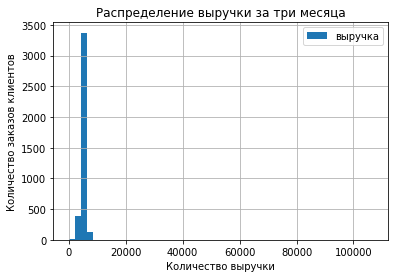

In [16]:
plt.hist(market_money['выручка'], bins=50, label=['выручка'])
plt.title('Распределение выручки за три месяца')
plt.legend(loc='upper right')
plt.xlabel('Количество выручки')
plt.ylabel('Количество заказов клиентов')
plt.grid()
plt.show()

Выведем выбивающиеся значения, возьмем заказы с выручкой больше 20000.

In [17]:
market_money.query('выручка >= 20000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


Данное значение - это явный выброс, поскольку он один, его удаление незначительно повлияет на выборку. Вероятно, выброс был вызван технической ошибкой.

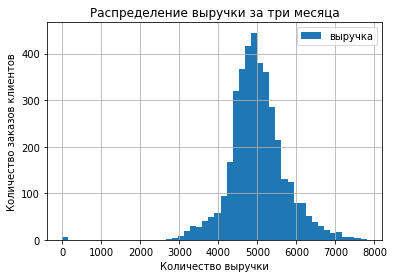

In [18]:
market_money = market_money.query('выручка < 20000').reset_index(drop=True)
#Проверим изменения
plt.hist(market_money['выручка'], bins=50, label=['выручка'])
plt.title('Распределение выручки за три месяца')
plt.legend(loc='upper right')
plt.xlabel('Количество выручки')
plt.ylabel('Количество заказов клиентов')
plt.grid()
plt.show()

Можно заметить выброс также на значении 0, избавимся от этих значений заранее.

In [19]:
market_money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


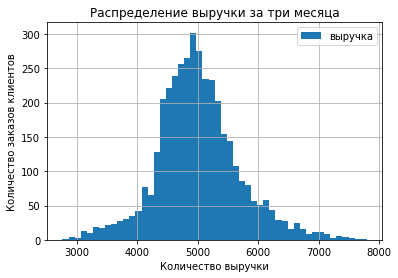

In [20]:
market_money = market_money.query('выручка != 0').reset_index(drop=True)
#Проверим изменения
plt.hist(market_money['выручка'], bins=50, label=['выручка'])
plt.title('Распределение выручки за три месяца')
plt.legend(loc='upper right')
plt.xlabel('Количество выручки')
plt.ylabel('Количество заказов клиентов')
plt.grid()
plt.show()

In [21]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3893 non-null   int64  
 1   период   3893 non-null   object 
 2   выручка  3893 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.4+ KB


### Датасет `market_time`

#### Названия столбцов


В названиях столбцов оставим русский алфавит за исключением id, в остальных случаях приведем названия к змеиному регистру.

In [22]:
market_time.rename(columns={
    'Период': 'период'},
    inplace=True)

market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


#### Дубликаты в данных

##### Явные дубликаты

In [23]:
market_time.duplicated().sum()

0

##### Неявные дубликаты

Проверим на неявные дубликаты столбец с категориальными данными.

In [24]:
col = 'период'
print(f'{col}: {market_time[col].unique()}')

период: ['текущий_месяц' 'предыдцщий_месяц']


Неявных дубликтаов не выявлено, но исправим опечатку в значении 'предыдцщий_месяц'.

In [25]:
market_time.loc[market_time['период'] == 'предыдцщий_месяц', 'период'] = 'предыдущий_месяц'

print(f'{col}: {market_time[col].unique()}')

период: ['текущий_месяц' 'предыдущий_месяц']


### Датасет `money`

#### Названия столбцов


В названиях столбцов оставим русский алфавит за исключением id, в остальных случаях приведем названия к змеиному регистру.

In [26]:
money.rename(columns={
    'Прибыль': 'прибыль'},
    inplace=True)

money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


#### Дубликаты в данных

##### Явные дубликаты

In [27]:
money.duplicated().sum()

0

### Вывод

В ходе предобработки данных проделаны следующие шаги:

- Датасет `market_file`:
    - Названия столбцов приведены к общему виду;
    - Явных дубликатов не обнаружено;
    - Обработаны неявные дубликаты (вероятно, человеческий фактор).
- Датасет `market_money`:
    - Названия столбцов приведены к общему виду;
    - Дубликатов не обнаружено;
    - Удален выброс в данных в столбце `выручка` (вероятно, техническая ошибка).
- Датасет `market_time`:
    - Названия столбцов приведены к общему виду;
    - Дубликатов не обнаружено;
    - Исправлена опечатка в столбце `период` (предположительно, человеческий фактор).
- Датасет `money`:
    - Названия столбцов приведены к общему виду;
    - Дубликатов не обнаружено.

## Исследовательский анализ данных

Рассмотрим данные по каждому датасету, при этом от клиентов, выручка которых равна 0, мы уже избавились, их оказалось не так много.

In [78]:
#Объявим заранее функции отображения графиков для компактности.
#Функция для категориальных переменных
def cat_plot(df, feature):
    colors = sns.color_palette('bright')
    display(df.pivot_table(
        index=feature,
        values='id',
        aggfunc='count').rename(columns={'id': 'количество'}))
    print('\n')
    plt.figure(figsize=(7,7))
    plt.pie(
        df[feature].value_counts(),
        autopct='%1.2f%%',
        #colors=colors,
        labels=dict(df[feature].value_counts()).keys())
    plt.title(f'Распределение признака `{feature}`')
    plt.legend(loc='upper right');

#Функция для количественных переменных
def num_hist_box(df, feature):
    plt.figure(figsize=(10,5))
    #plt.hist(df[feature], bins=30, edgecolor='black')
    sns.histplot(df, bins=20, x=feature, kde=True)
    plt.title(f'Распределение `{feature}`')
    plt.xlabel(f'Значение `{feature}`')
    plt.ylabel('Количество клиентов')
    plt.grid()
    plt.show()

    plt.figure(figsize=(10,5))
    plt.boxplot(df[feature])
    plt.title(f'Значение `{feature}` с выбросами')
    plt.ylabel(f'Значение `{feature}`');
    
def num_hist(df, feature):
    plt.figure(figsize=(10,5))
    #plt.hist(df[feature], bins=30, edgecolor='black')
    sns.histplot(df, bins=20, x=feature, kde=True)
    plt.title(f'Распределение `{feature}`')
    plt.xlabel(f'Значение `{feature}`')
    plt.ylabel('Количество клиентов')
    plt.grid()
    plt.show()

### Датасет `market_file`

#### Столбец `покупательская_активность`

,количество
покупательская_активность,
Прежний уровень,802
Снизилась,498


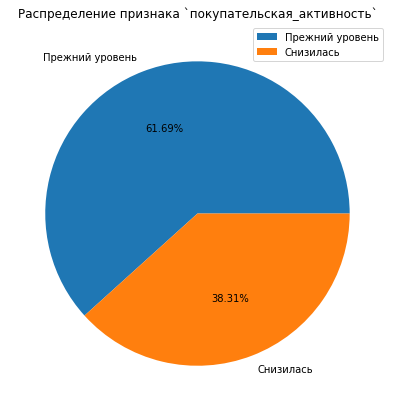

In [29]:
cat_plot(market_file, 'покупательская_активность')

**Вывод**

`покупательская активность` действительно снижается, об этом нам говорит распределение выборки. Активность 38 процентов пользователей снизилась, в то время как у 62 процентов она остается прежней.

#### Столбец `тип_сервиса`

,количество
тип_сервиса,
премиум,376
стандарт,924


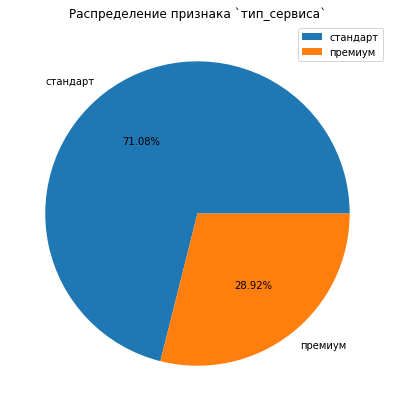

In [30]:
cat_plot(market_file, 'тип_сервиса')

**Вывод**

В распределении типов сервиса все очевидно, стандартную подписку имеют большинство 71%, в то время как премиум только 29%.

#### Столбец `разрешение_сообщать`

,количество
разрешение_сообщать,
да,962
нет,338


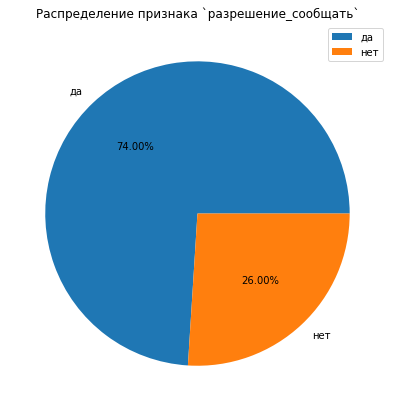

In [31]:
cat_plot(market_file, 'разрешение_сообщать')

**Вывод**

Дали разрешение на рассылку и сообщения дали 74%, а запретили 26%.

#### Столбец `маркет_актив_6_мес`

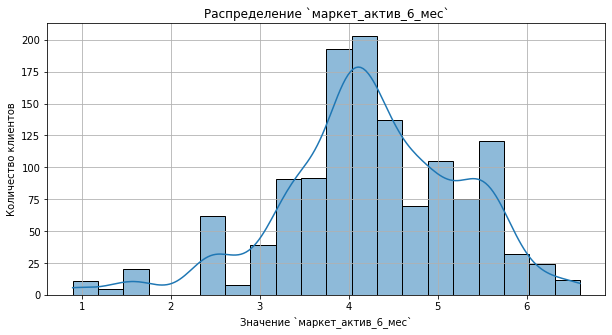

In [32]:
num_hist(market_file, 'маркет_актив_6_мес')

**Вывод**

Распределение маркетинговой активности имеет максимальное значение на 4 контактах с клиентом, вероятно, это является необходимым минимумом в отделе маркетинга, звонок или реклама раз в неделю.

#### Столбец `маркет_актив_тек_мес`

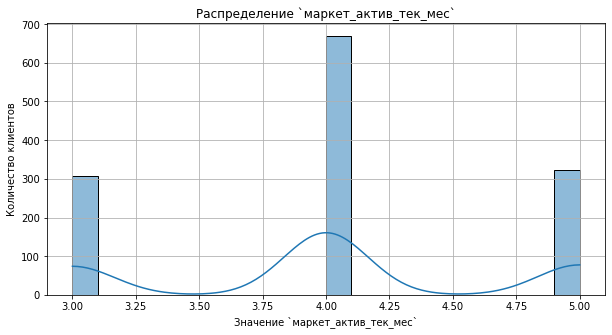

In [33]:
num_hist(market_file, 'маркет_актив_тек_мес')

**Вывод**

На распределении месячной маркетинговой активности видим подтверждение предыдущего вывода, в месяц делается в среднем 4 контакта с клиентом.

#### Столбец `длительность`

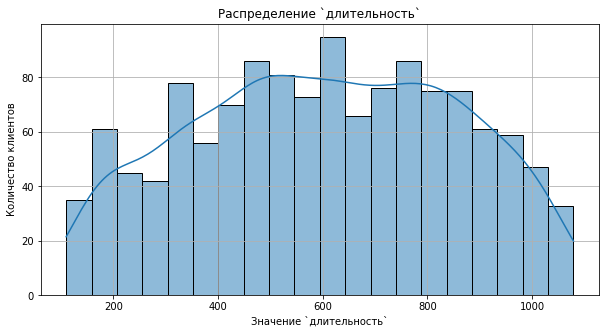

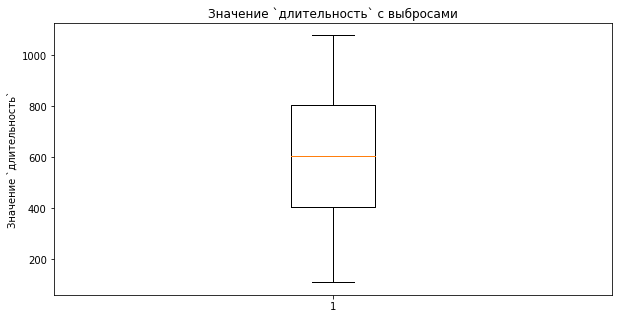

In [34]:
num_hist_box(market_file, 'длительность')

**Вывод**

Распределние длительности регистрации показывает изменение притока пользователей на сайт. Можно заметить, что самых первых клиентов, зарегистрировавшихся более 1000 дней назад, мало, как и бывает в начале открытия сайта, пока никто не знает о нем. Затем был рост и судя по самый последним клиентам, рост замедлился, что, действительно, говорит о снижении активности пользователей и приходе всей целевой аудитории, которая могла.

#### Столбец `акционные_покупки`

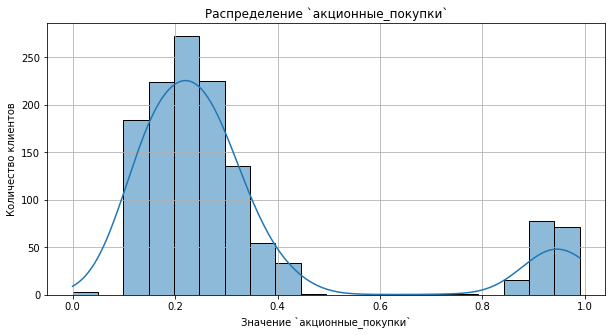

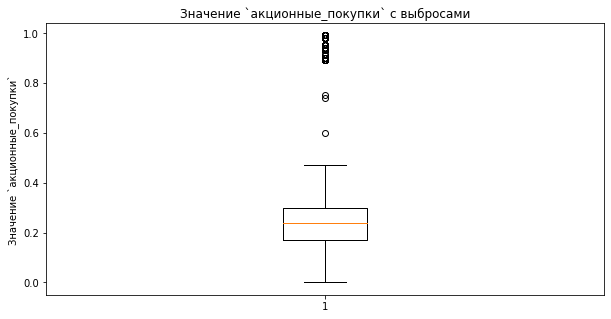

In [35]:
num_hist_box(market_file, 'акционные_покупки')

**Выбросы**

Можно заметить, что распределение разделяет клиентов на две группы: те, кто периодически покупает товары по акции, и те, кто покупает практически по акции. Вероятно, одни отслеживют акции, а другие нет.

#### Столбец `поп_категория`

,количество
поп_категория,
Домашний текстиль,251
Косметика и аксесуары,223
Кухонная посуда,138
Мелкая бытовая техника и электроника,174
Техника для красоты и здоровья,184
Товары для детей,330


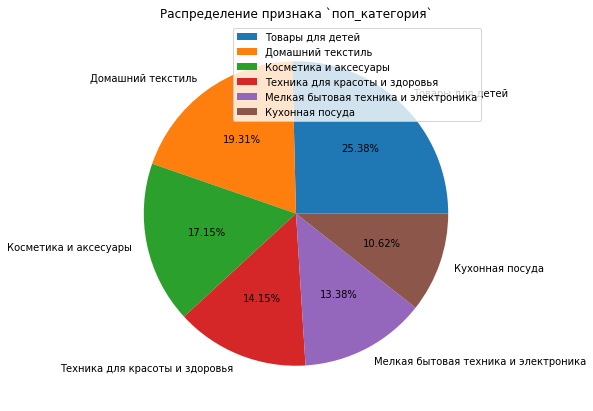

In [36]:
cat_plot(market_file, 'поп_категория')

**Вывод**

По распределению можно заметить, что наиболее популярными категориями у клиентов являются:
- Товары для детей(25%);
- Домашний текстиль(19%);
- Косметика и аксесуары(17%).

#### Столбец `средний_просмотр_категорий_за_визит`

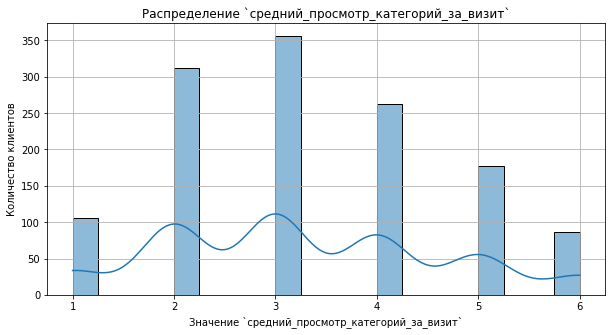

In [37]:
num_hist(market_file, 'средний_просмотр_категорий_за_визит')

**Вывод**

Распредление показало, что наиболее часто покупатель смотрит  3 категории.

#### Столбец `неоплаченные_продукты_квартал`

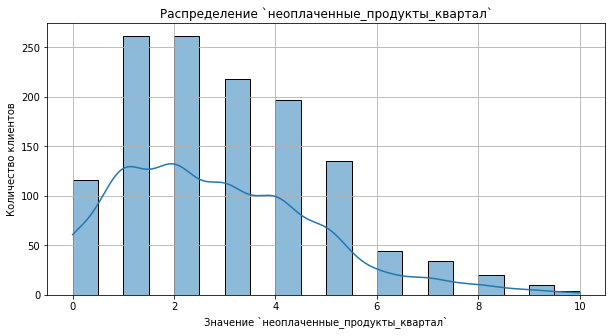

In [38]:
num_hist(market_file, 'неоплаченные_продукты_квартал')

**Вывод**

В большинстве случаев, клиенты имеют в своей корзине от 1 до 4 неоплаченных товаров.

#### Столбец `ошибка_сервиса`

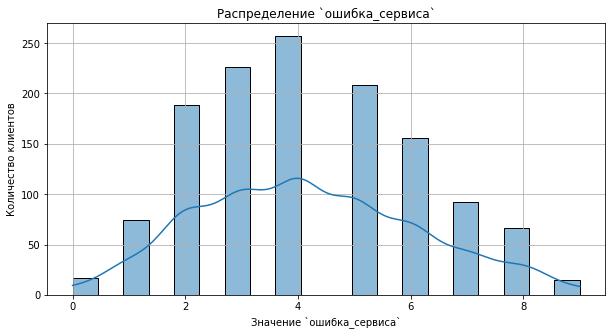

In [39]:
num_hist(market_file, 'ошибка_сервиса')

**Вывод**

Ошибок сервиса, с которыми столкнулся покупатель, имеет наиболее часто встречаемое значение 4 раза и распределение количества ошибок имеет нормальное распределение.

#### Столбец `страниц_за_визит`

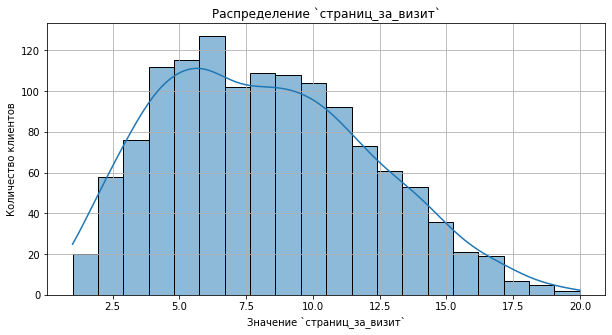

In [40]:
num_hist(market_file, 'страниц_за_визит')

**Вывод**

Распредление среднего количества страниц за 3 месяца имеет нормальное распределение и имеет наиболее частое значение около 5 страниц за визит.

### Датасет `market_money`

#### Столбец `период`

,количество
период,
предыдущий_месяц,1297
препредыдущий_месяц,1297
текущий_месяц,1299


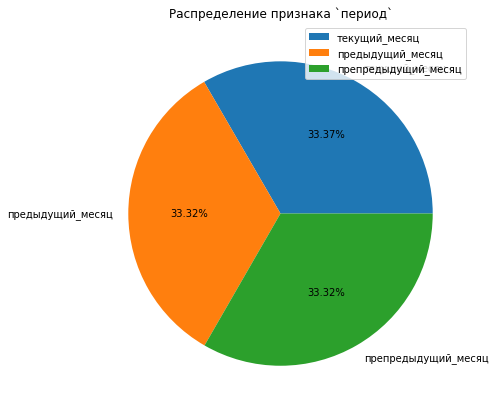

In [41]:
cat_plot(market_money, 'период')

**Вывод**

По графику можно заметить, что клиенты, отобранные для выборки были распределены равномерно между тремя месяцами, пока мы не удалили некоторых на этапе предобработки.

#### Столбец `выручка`

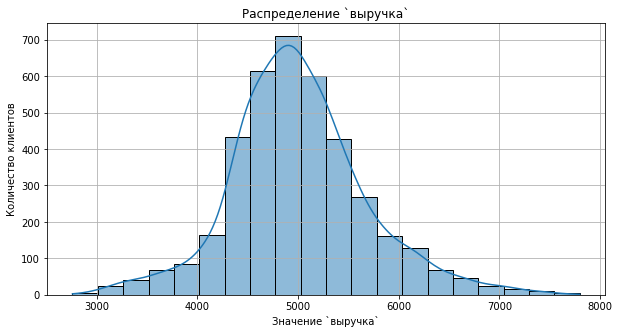

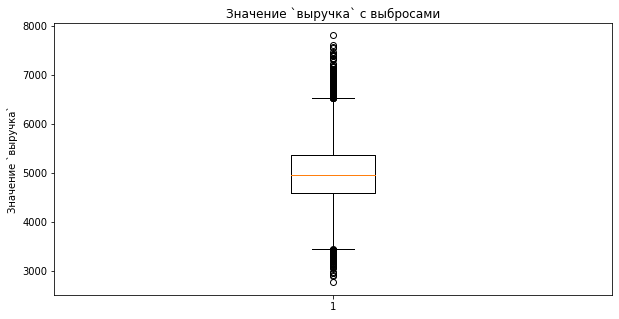

In [42]:
num_hist_box(market_money, 'выручка')

Рассчитаем выручку по месяцам и построим распредление выручки по месяцам.

In [43]:
month_income = market_money.pivot_table(index='период', values='выручка', aggfunc='sum').sort_values(by='выручка', ascending=True)
month_income

,выручка
период,
препредыдущий_месяц,6272769.0
предыдущий_месяц,6417996.5
текущий_месяц,6802586.9


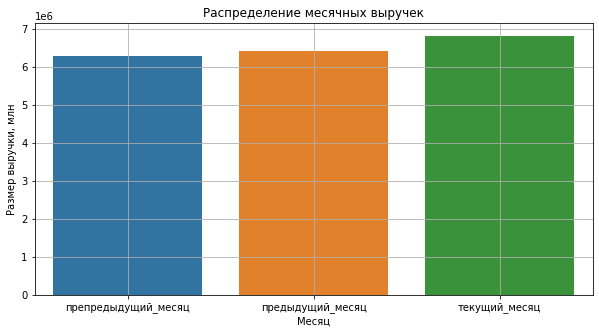

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(data=month_income, x=month_income.index, y='выручка')
plt.title(f'Распределение месячных выручек')
plt.xlabel(f'Месяц')
plt.ylabel('Размер выручки, млн')
plt.grid()
plt.show()

**Вывод**

Выручка постпенно увеличивается с каждым месяцем в среднем на 4%.

### Датасет `market_time`

#### Столбец `период`

,количество
период,
предыдущий_месяц,1300
текущий_месяц,1300


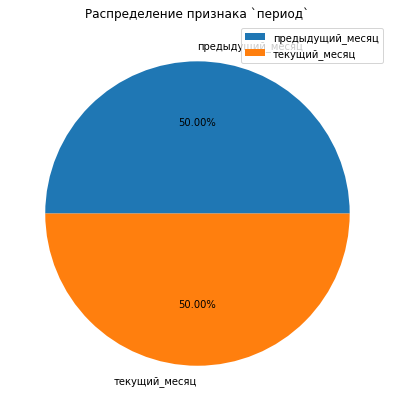

In [45]:
cat_plot(market_time, 'период')

**Вывод**

Наблюдается ровное разделение данных на два месяца.

#### Столбец `минут`

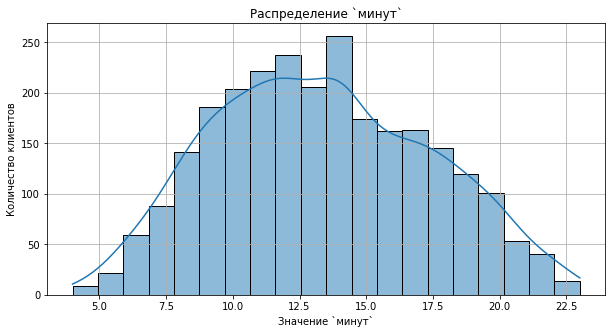

,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


In [46]:
num_hist(market_time, 'минут')

market_time.describe().T

,минут
период,
предыдущий_месяц,17508
текущий_месяц,17166


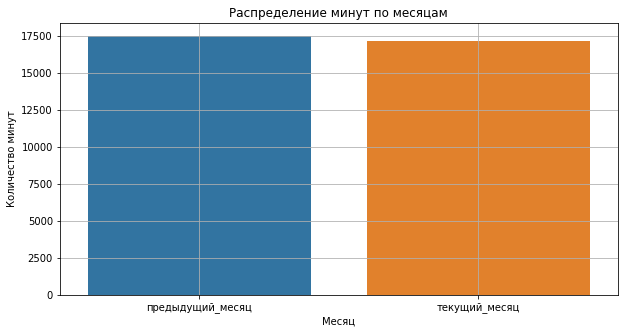

Количество минут предыдущего месяца больше на 1.992%


In [47]:
month_minute = market_time.pivot_table(index='период', values='минут', aggfunc='sum')
display(month_minute)

plt.figure(figsize=(10,5))
sns.barplot(data=month_minute, x=month_minute.index, y='минут')
plt.title(f'Распределение минут по месяцам')
plt.xlabel(f'Месяц')
plt.ylabel('Количество минут')
plt.grid()
plt.show()

print(f'Количество минут предыдущего месяца больше на {round(((float(month_minute.iloc[0]) / float(month_minute.iloc[1])) - 1) * 100, 3)}%')

**Вывод**

Распределение минут имеет вид нормального. Несмотря на то, что записи разделены по месяцам поровну, количество минут в предыдущем месяце больше, чем в текущем на 2%.

### Датасет `money`

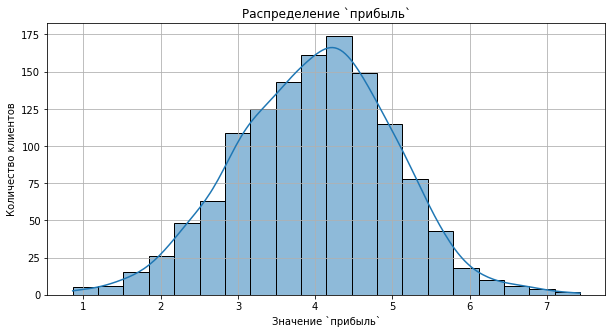

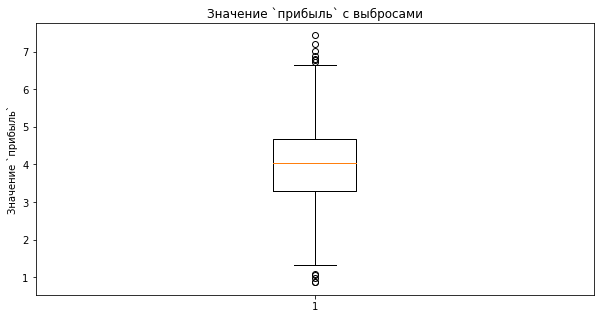

In [48]:
num_hist_box(money, 'прибыль')

**Вывод**

Значения прибыли среди клиентов распределено нормально. Есть небольшие отклонения от IQR, но в связи со спецификой значений прибыли было принято рещение их оставить.

### Отбор клиентов с покупательской способностью

Мы, конечно, уже удалили выбросы в данных и нулевые значения, но по количеству записей в датасете `market_money` по месяцам (см. п. 4.2.1), можно сделать вывод о том, что не все клиенты распределены ровно между тремя месяцами.

,количество
период,
предыдущий_месяц,1296
препредыдущий_месяц,1296
текущий_месяц,1296


[215348, 215357, 215359, 215380]

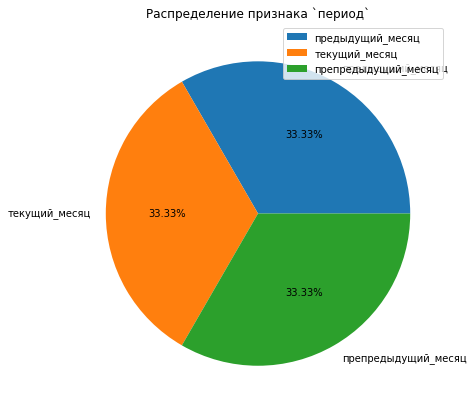

In [49]:
different_client = market_money.pivot_table(index='id', values='период', aggfunc='count')
diff_client_id = list(different_client.query('период < 3').index)
#Удалим клиентов с неполной покупательской способностью
market_money = market_money.query('id != @diff_client_id')
#Убедимся в правильности
cat_plot(market_money, 'период')
display(diff_client_id)

### Вывод

По исследовательскому анализу можно сделать следующие выводы:
- Датасет `market_file`:
    - Признак `покупательская активность`. Она действительно снижается, об этом нам говорит распределение выборки. Активность 38 процентов пользователей снизилась, в то время как у 62 процентов она остается прежней;
    - Признак `тип_сервиса`. В распределении все очевидно, стандартную подписку имеют большинство 71%, в то время как премиум только 29%;
    - Признак `разрешение_сообщать`. Дали разрешение на рассылку и сообщения дали 74%, а запретили 26%;
    - Признак `маркет_актив_6_мес`. Распределение маркетинговой активности имеет максимальное значение на 4 контактах с клиентом, вероятно, это является необходимым минимумом в отделе маркетинга, звонок или реклама раз в неделю;
    - Признак `маркет_актив_тек_мес`. На распределении месячной маркетинговой активности видим подтверждение предыдущего вывода, в месяц делается в среднем 4 контакта с клиентом.
    - Признак `длительность`. Распределние длительности регистрации показывает изменение притока пользователей на сайт. Можно заметить, что самых первых клиентов, зарегистрировавшихся более 1000 дней назад, мало, как и бывает в начале открытия сайта, пока никто не знает о нем. Затем был рост и судя по самый последним клиентам, рост замедлился, что, действительно, говорит о снижении активности пользователей и приходе всей целевой аудитории, которая могла;
    - Признак `акционные_покупки`. Распределение столбца разделяет клиентов на две группы: те, кто периодически покупает товары по акции, и те, кто покупает практически по акции. Вероятно, одни отслеживют акции, а другие нет.
    - Признак `поп_категория`. По распределению было замечено, что наиболее популярными категориями у клиентов являются:
        - Товары для детей(25%);
        - Домашний текстиль(19%);
        - Косметика и аксесуары(17%).
    - Признак `средний_просмотр_категорий`. Распредление показало, что наиболее часто покупатель смотрит в большинстве случаев 3 категории;
    - Признак `неоплаченные_продукты_квартал`. В большинстве случаев, клиенты имеют в своей корзине от 1 до 4 неоплаченных товаров.
    - Признак `ошибка_сервиса`. Ошибок сервиса, с которыми столкнулся покупатель, имеет наиболее часто встречаемое значение 4 раза и распределение количества ошибок имеет нормальное распределение.
    - Признак `страниц_за_визит`. Распредление среднего количества страниц за 3 месяца имеет нормальное распределение и имеет наиболее частое значение около 5 страниц за визит.
    
    
- Датасет `market_money`:
    - Признак `период`. Было замечено, что клиенты, отобранные для выборки были распределены равномерно между тремя месяцами и отобраны активные из них;
    - Признак `выручка`. Данные распределены нормально с медианой около 5000. Имеются выбросы, но были исключены только нереалистичные и нулевые, чтобы не искажать данные. Выручка постпенно увеличивается с каждым месяцем в среднем на 4%.


- Датасет `market_time`:
    - Признак `период`. В столбце наблюдается ровное разделение данных на два месяца;
    - Признак `минут`. Распределение минут имеет вид нормального с медианой 13. Несмотря на то, что записи разделены по месяцам поровну, количество минут в предыдущем месяце больше, чем в текущем на 2%.


- Датасет `money`:
    - Признак `прибыль`. Значения прибыли среди клиентов распределено нормально. Есть небольшие отклонения от IQR, но в связи со спецификой значений прибыли было принято рещение их оставить.


- Общий вывод:
    - Данные пригодны для дальнейшего исследования, критических изменений не внесено. Покупательская активность действительно снижается, так как была набрана целевая категория, поэтому одним из варинатов решения проблемы будут персонализирвоанные предложения.

## Объединение таблиц

In [50]:
market_money_group = market_money.pivot_table(index='id', columns='период')
market_money_group.head(10)

выручка                                  
период предыдущий_месяц препредыдущий_месяц текущий_месяц
id                                                       
215349           5216.0              4472.0        4971.6
215350           5457.5              4826.0        5058.4
215351           6158.0              4793.0        6610.4
215352           5807.5              4594.0        5872.5
215353           4738.5              5124.0        5388.5
215354           5685.0              4503.0        5869.6
215355           3263.0              4749.0        3772.6
215356           4146.5              4433.0        4566.4
215358           3488.0              4727.0        4209.5
215360           5304.5              5555.0        5834.9

In [51]:
market_full = pd.merge(market_file, market_money_group, on='id')
market_full.head()

,id,покупательская_активность,тип_сервиса,разрешение_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,поп_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_квартал,ошибка_сервиса,страниц_за_визит,"(выручка, предыдущий_месяц)","(выручка, препредыдущий_месяц)","(выручка, текущий_месяц)"
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5


In [52]:
market_time_group = market_time.pivot_table(index='id', columns='период')
market_time_group.head()

минут              
период предыдущий_месяц текущий_месяц
id                                   
215348               13            14
215349               12            10
215350                8            13
215351               11            13
215352                8            11

In [53]:
market_full = pd.merge(market_full, market_time_group, on='id')
market_full.rename(columns={
    ('выручка', 'предыдущий_месяц'): 'выручка_за_предыдущий_месяц',
    ('выручка', 'препредыдущий_месяц'): 'выручка_за_препредыдущий_месяц',
    ('выручка', 'текущий_месяц'): 'выручка_за_текущий_месяц',
    ('минут', 'предыдущий_месяц'): 'минут_за_предыдущий_месяц',
    ('минут', 'текущий_месяц'): 'минут_за_текущий_месяц'}, inplace=True)
market_full.head()

,id,покупательская_активность,тип_сервиса,разрешение_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,поп_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц,минут_за_предыдущий_месяц,минут_за_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


## Корреляционный анализ данных

Перед созданием моделей машинного обучения необходимо провести корреляционный анализ, чтобы выяснить с чем коррелирует целевой признак и есть ли линейно-зависимые переменные.

### Построение матрицы корреляции

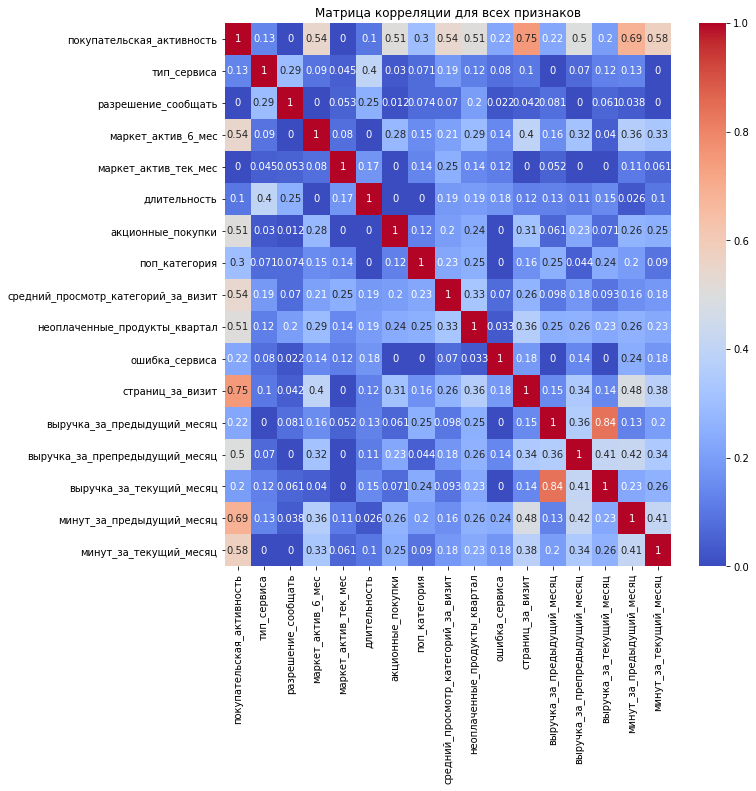

In [54]:
#Матрица корреляции со всеми признаками
plt.figure(figsize=(10, 10))
sns.heatmap(market_full
    .drop('id', axis=1)
    .phik_matrix(
        interval_cols=['маркет_актив_6_мес',
                       'маркет_актив_тек_мес',
                       'длительность',
                       'акционные_покупки',
                       'средний_просмотр_категорий_за_визит',
                       'неоплаченные_продукты_квартал',
                       'ошибка_сервиса',
                       'страниц_за_визит',
                       'выручка_за_предыдущий_месяц',
                       'выручка_за_препредыдущий_месяц',
                       'выручка_за_текущий_месяц',
                       'минут_за_предыдущий_месяц',
                       'минут_за_текущий_месяц']),
    annot=True, 
    cmap='coolwarm')
plt.title('Матрица корреляции для всех признаков')
plt.show();

### Вывод

В ходе корреляционного анализа были сделаны следующие выводы:
- Между признаками `выручка_за_текущий_месяц` и `выручка_за_предыдущий_месяц` наблюдается зависимость (0.84), но поскольку она меньше 0.9, мы не можем говорить о мультиколлинеарности, поэтому оставим их.
- Целевой признак `покупательская_активность` имеет заметную или высокую корреляцию со следующими признаками:
    - `маркет_актив_6_мес` (0.54);
    - `акционные_покупки` (0.51);
    - `средний_просмотр_категорий_за_визит` (0.54);
    - `неоплаченные_продукты_квартал` (0.51);
    - `страниц_за_визит` (0.75);
    - `выручка_за_препредыдущий_месяц` (0.5);
    - `минут_за_предыдущий_месяц` (0.69);
    - `минут_за_текущий_месяц` (0.58).

## Построение моделей машинного обучения

В данном пункте мыы с помощью пайплайнов обучим четыре модели машинного ообучения: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(), и выберем лучшую из них. Прежде чем начать работу с моделями, подготовим данные: удалим столбец `id` и категоризируем столбец `покупательская_активность` (снизилась - 1, осталась прежней - 0)

### Разработка пайплайна

In [55]:
#market_full_future = market_full.copy()
market_full['покупательская_активность_кат'] = market_full['покупательская_активность'].apply(lambda x: 1 if x == 'Снизилась' else 0)
market_full = market_full.drop(['покупательская_активность'], axis=1)
market_full = market_full.set_index('id')
market_full.head()

,тип_сервиса,разрешение_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,поп_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц,минут_за_предыдущий_месяц,минут_за_текущий_месяц,покупательская_активность_кат
id,,,,,,,,,,,,,,,,,
215349,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,1
215350,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,1
215351,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,1
215352,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,1
215353,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,1


In [56]:
#Cоздание константы RANDOM_STATE
RANDOM_STATE = 42
#Подготовка выборок
X = market_full.drop('покупательская_активность_кат', axis=1)
y = market_full['покупательская_активность_кат']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
    stratify=y)
#Поскольку активность снизилась у меньшего количества людей, для полноценного исследования используем стратификацию

ohe_columns = ['разрешение_сообщать', 'поп_категория']
ord_columns = ['тип_сервиса']
num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_за_предыдущий_месяц',
    'выручка_за_препредыдущий_месяц',
    'выручка_за_текущий_месяц',
    'минут_за_предыдущий_месяц',
    'минут_за_текущий_месяц']

In [57]:
# Создаем пайплайны для подготовки признаков
ohe_pipe= Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))])

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(
        categories=[['стандарт', 'премиум']],
        handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', MinMaxScaler(), num_columns)],
    remainder='passthrough')

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [58]:
param_grid = [
    # Словарь для модели DicisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # Словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2 ,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # Словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1')],
        'models__C': [0.1, 1, 2, 3, 4, 5, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # Словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(2, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [59]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1)

randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['разрешение_сообщать',
                                                                                'поп_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                SimpleImputer...
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': [0.1, 1, 2, 3, 4, 5, 10,
                                                       100],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        probability=True,
                                                        random_state=42)],
                                         'models__degree': range(2, 4),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [60]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['разрешение_сообщать',
                                                   'поп_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                           

In [61]:
y_test_proba = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_proba)}')

Метрика ROC-AUC на тестовой выборке: 0.915867815394572


### Вывод

В ходе разработки пайплайнов было выявлено, что лучшей моделью является модель логичтиской регрессии со следующими параметрами `LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')`. В качестве метрики была выбрана ROC-AUC, для тренировочной выборки метрика составила 0.9, а для валидационной выборки 0.89. Это является хорошим результатом и подтверждает качество разработанной модели.

## Анализ важности признаков

### Построение графиков

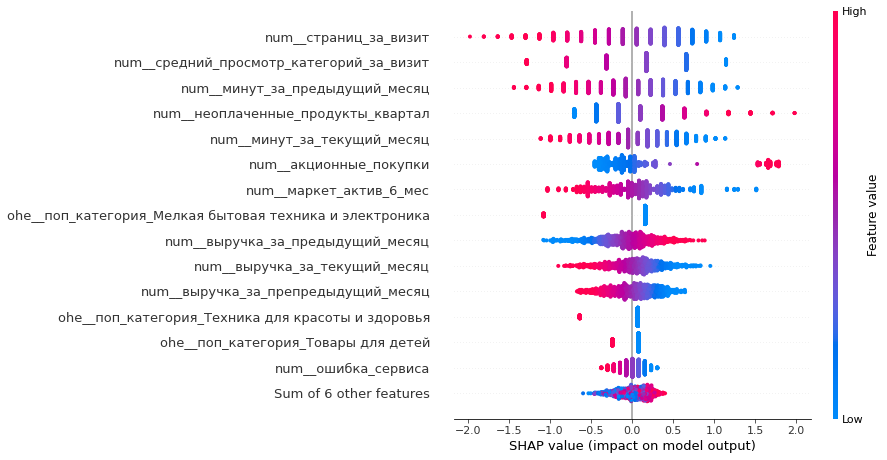

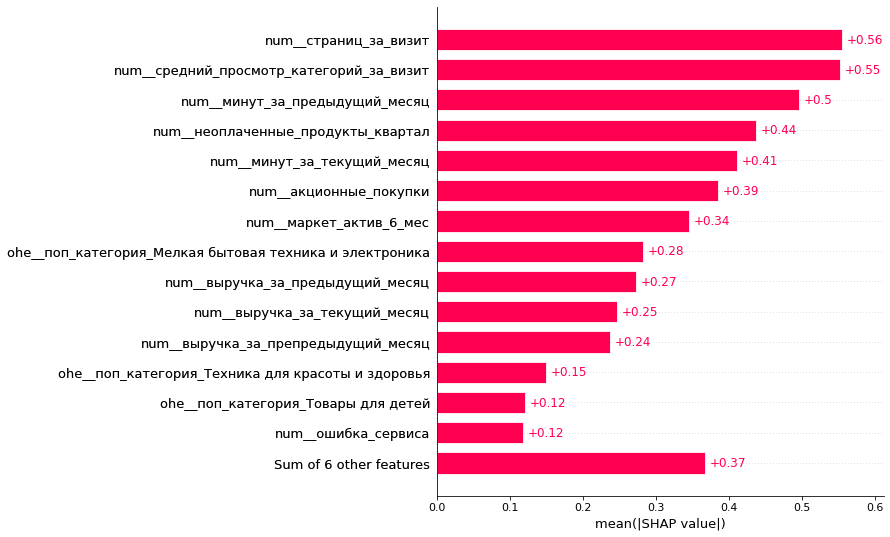

In [62]:
# Получение преобразователя из pipeline
best_model = randomized_search.best_estimator_
data_preprocessor = best_model.named_steps['preprocessor']

# Применение преобразований к X_train и к X_test
X_train_transformed = data_preprocessor.transform(X_train)
X_test_transformed = data_preprocessor.transform(X_test)

# Получение названий столбцов
feature_names = data_preprocessor.get_feature_names_out()

# Создание explainer
explainer = shap.LinearExplainer(best_model.named_steps['models'], X_train_transformed, feature_names=feature_names)

shap_values = explainer(X_train_transformed)
shap.plots.beeswarm(shap_values, max_display=15)
shap.plots.bar(shap_values, max_display=15)

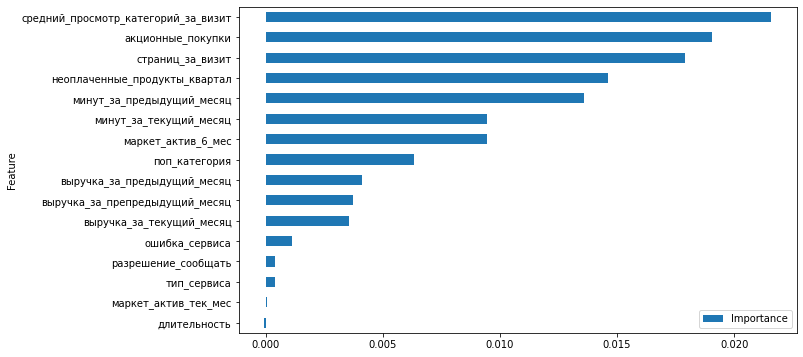

In [63]:
# Оценим влияние признаков с помощью Permutation Importance
permutation = permutation_importance(best_model, X_train, y_train, scoring = 'roc_auc')

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': permutation['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

plt.show()

### Вывод

В результате анализа важности признаков можно сделать следующие выводы:
- Наиболее важными для модели являются следующие признаки:
    - `страниц_за_визит` (Чем больше значение, тем выше вероятность сохранения прежней активности);
    - `средний_просмотр_категорий_за_визит` (Чем больше значение, тем выше вроятность сохранения прежней активности);
    - `минут_за_предыдущий_месяц` (Чем больше значение, тем выше вроятность сохранения прежней активности);
    - `неоплаченные_продукты_квартал` (Чем меньше значение, тем выше вроятность сохранения прежней активности);
    - `минут_за_текущий_месяц` (Чем больше значение, тем выше вроятность сохранения прежней активности);
    - `акционные_покупки` (Чем меньше значение, тем выше вроятность сохранения прежней активности).

## Сегментация покупателей

Прежде чем начать работу по сегментации пользователей, объеденим датасеты и оценим влияние признаков на прибыль компании от конкретного клиента.

### Выявление сегментов

In [64]:
def graphic_scatter(data, x, y, hue, title):
    plt.figure(figsize=(7,7))
    sns.scatterplot(
        data=data,
        x=x,
        y=y,
        hue=hue)
    plt.title(title)
    plt.show()

def searching_hist(data, feature, hue):    
    plt.figure(figsize=(10,5))
    #plt.hist(df[feature], bins=30, edgecolor='black')
    sns.histplot(data, bins=20, x=feature, hue=hue, kde=True)
    plt.title(f'Распределение `{feature}`')
    plt.xlabel(f'Значение `{feature}`')
    plt.ylabel('Количество клиентов')
    plt.grid()
    plt.show()

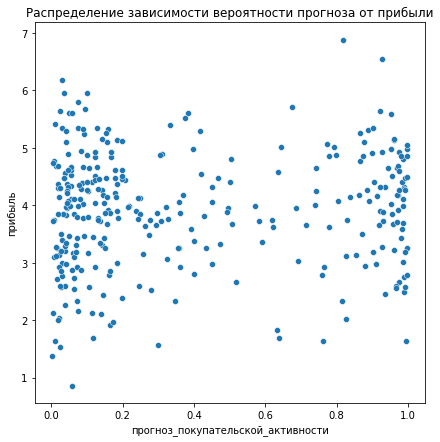

In [65]:
money = money.set_index('id')
market_income = pd.merge(X_test, money, left_index=True, right_index=True)
market_income.head()
market_income['прогноз_покупательской_активности'] = y_test_proba

plt.figure(figsize=(7,7))
sns.scatterplot(
    data=market_income,
    x='прогноз_покупательской_активности',
    y='прибыль')
plt.title('Распределение зависимости вероятности прогноза от прибыли')
plt.show()

В качестве сегмента для рассмотрения выберем покупателей с высокой вероятносью к снижению активности и высокой прибылью. Возьмем порог 0.7 для вероятности и 3 для прибыли.

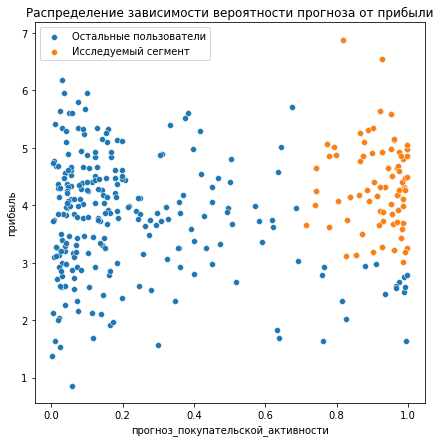

In [66]:
market_segment = market_income.query('(прогноз_покупательской_активности > 0.7) & (прибыль > 3)')

plt.figure(figsize=(7,7))
sns.scatterplot(
    data=market_income,
    x='прогноз_покупательской_активности',
    y='прибыль',
    label='Остальные пользователи')
sns.scatterplot(
    data=market_segment,
    x='прогноз_покупательской_активности',
    y='прибыль',
    label='Исследуемый сегмент')
plt.legend()
plt.title('Распределение зависимости вероятности прогноза от прибыли')
plt.show()

### Изучение сегмента

In [67]:
#Выделим группу акционных покупателей с границей в 0.6(см. п.4.1.7)
market_segment['акционная_категория'] = market_segment['акционные_покупки'].apply(lambda x: 1 if x >= 0.6 else 0)
market_segment['акционная_категория'].value_counts()

0    50
1    27
Name: акционная_категория, dtype: int64

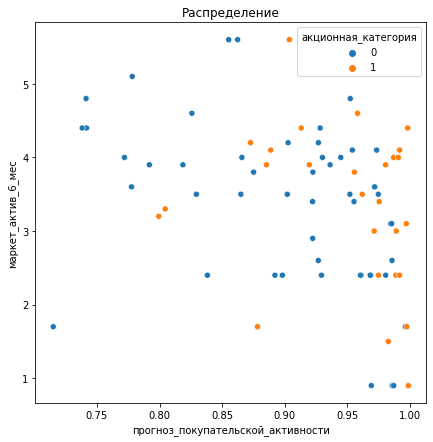

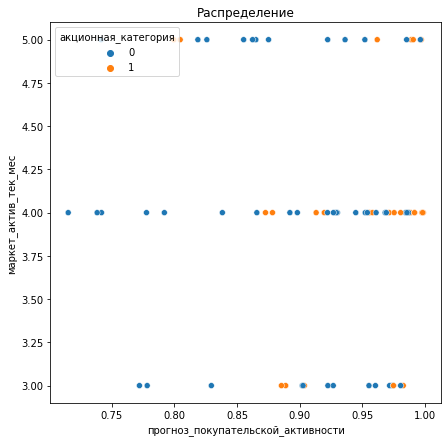

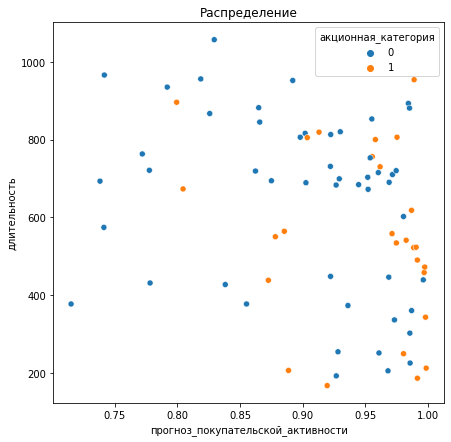

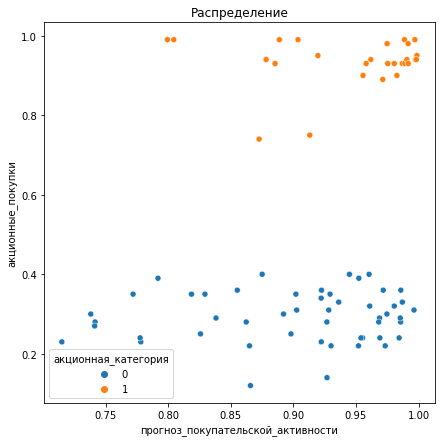

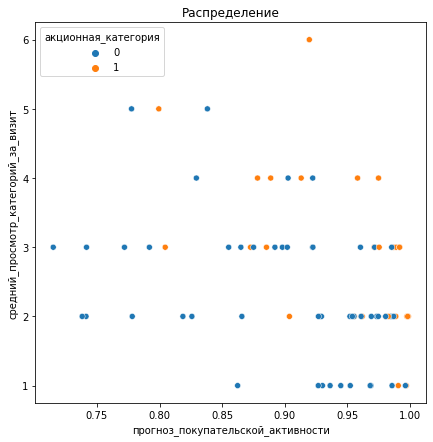

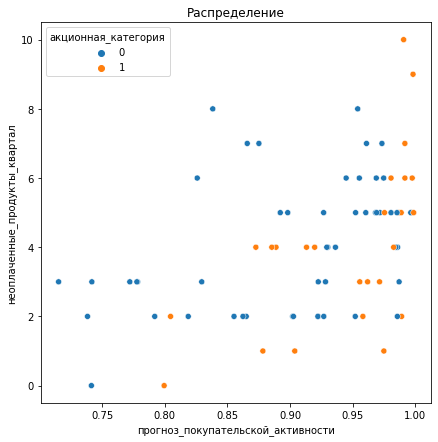

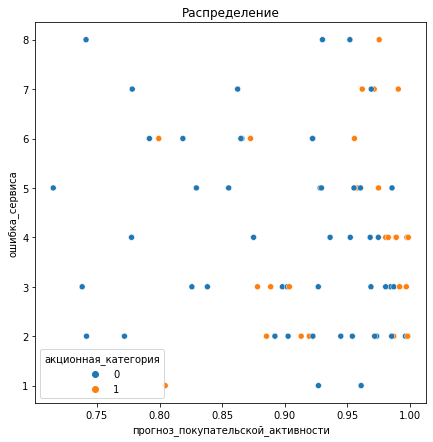

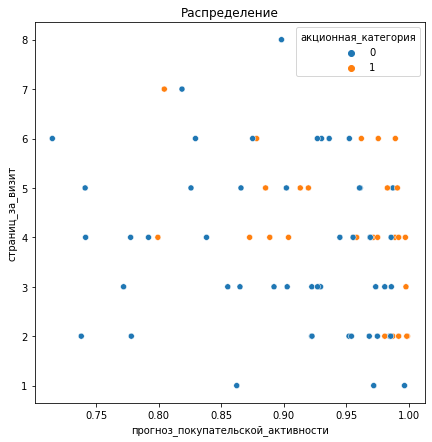

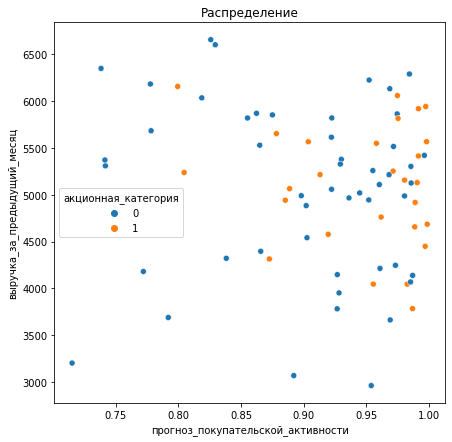

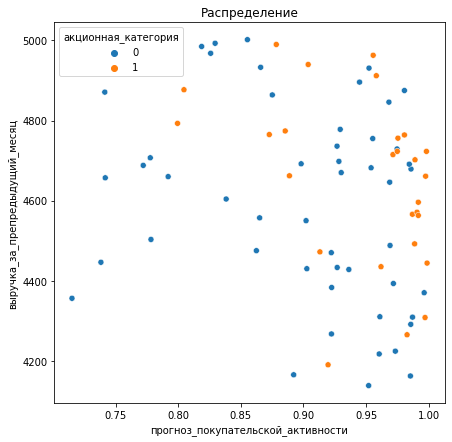

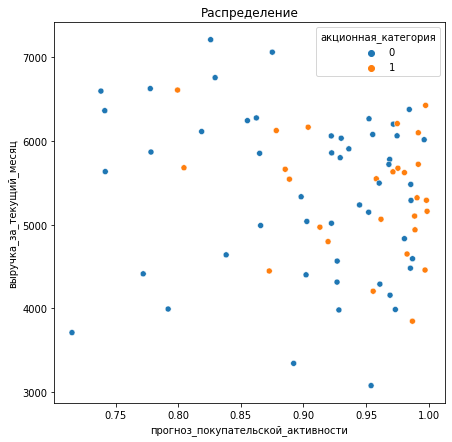

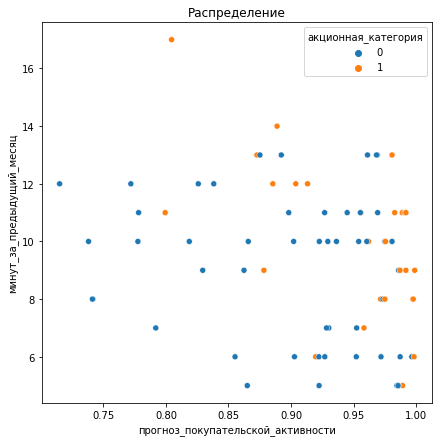

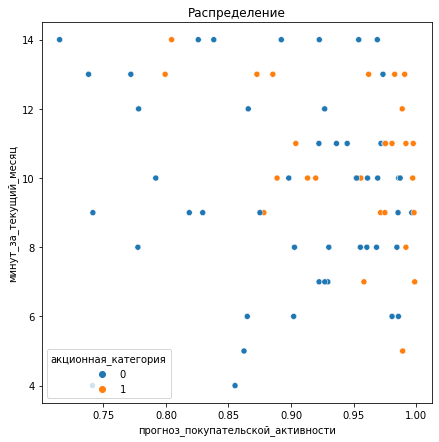

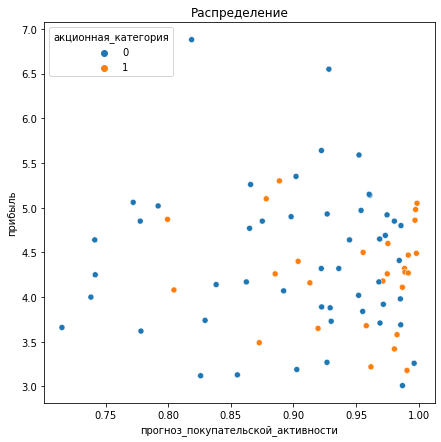

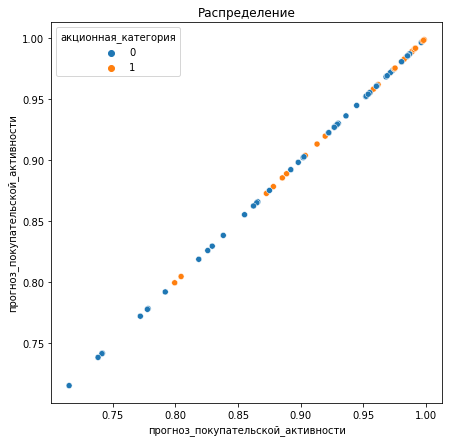

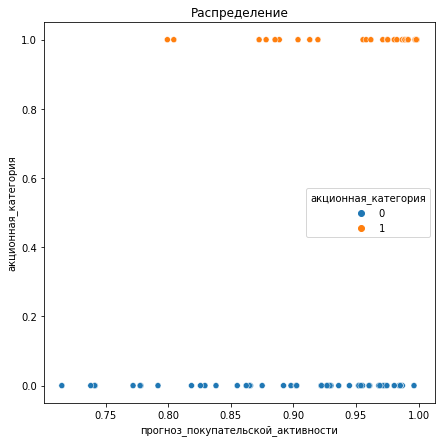

In [68]:
num_corr_features = list(market_segment.select_dtypes(include='number').columns)
for col in num_corr_features:
    graphic_scatter(market_segment, 'прогноз_покупательской_активности', col, 'акционная_категория', 'Распределение')

Во всех количественных переменных видна тенденция акционных клиентов к снижению активности, если по рассматриваемому признаку они распределены равномерно, то большая часть находится в правой части графика рассеивания. Выделить можно признаки `акционные_покупки` и `неоплаченные_продукты_квартал`, в акционных покупках наблюдается кучкование наблюдений в правом верхнем углу, что говороит о том, что в большинстве случаев в рассматрвиаемой группе снижается активность. Проверим категориальные переменные.

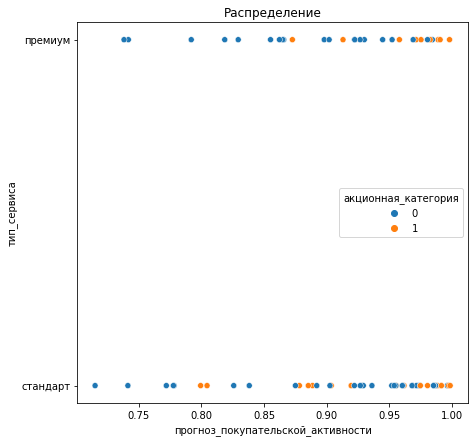

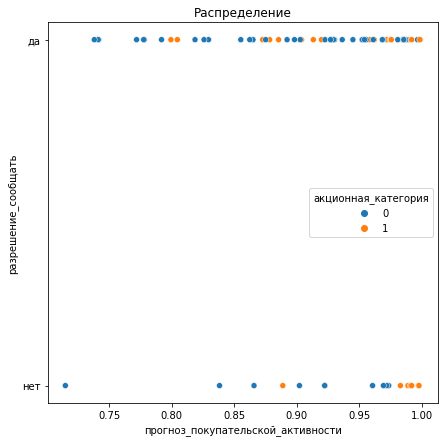

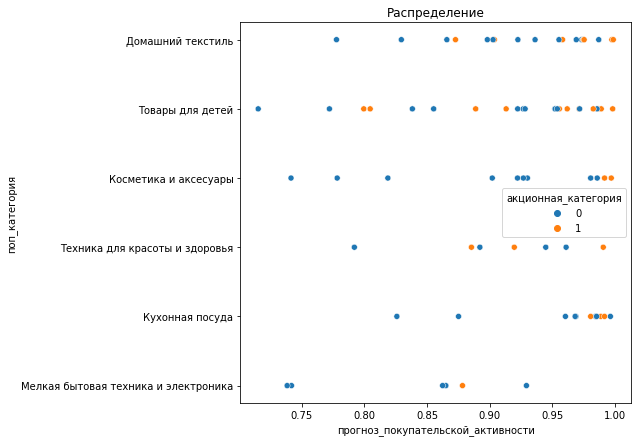

In [69]:
cat_corr_features = list(
    test_features_quit
    .loc[:, ~test_features_quit
    .columns.isin(['id'])].select_dtypes(include='object').columns)

for col in cat_corr_features:
    graphic_scatter(market_segment, 'прогноз_покупательской_активности', col, 'акционная_категория', 'Распределение')

По категориальным признакам группа акционных покупок распределена равномерно, рассмотрим более подробно уже выбранные количественные переменные.

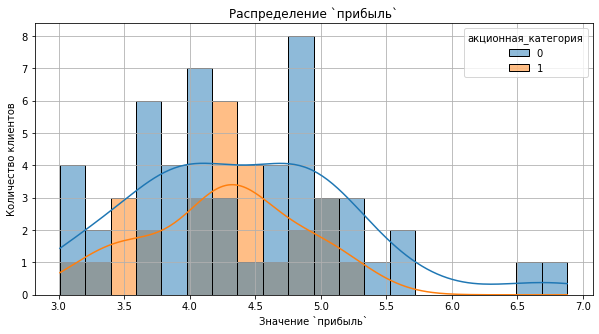

In [70]:
searching_hist(market_segment, 'прибыль', 'акционная_категория')

In [72]:
market_segment_research = market_segment.query('акционная_категория == 1')
market_segment_other = market_segment.query('акционная_категория == 0')

display(market_segment_research.shape)
display(market_segment_other.shape)

(27, 19)

(50, 19)

In [74]:
# задаём уровень значимости
alpha = 0.05

market_segment_other_group = market_segment_other.sample(n=27, random_state=RANDOM_STATE)
results = st.ttest_ind(market_segment_research['прибыль'], market_segment_other_group['прибыль'], alternative='less')

display(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')

'p-value: 0.09346475471824886'

'Нет оснований отвергнуть нулевую гипотезу'

Вне зависимости от снижения активности значение `прибыли` при сравнении акционных покупателей и неакционных имеет похожее распределение и статистически подтверждено, что с высокой долей вероятности люди со сниженной активностью покупают столько же сколько и остальные пользователи. Сравним колчиество клиентов в исследуемом сегменте с остальными пользователями по различным признакам, воспользовавшись диаграммой Исикавы, предложенной в задании.
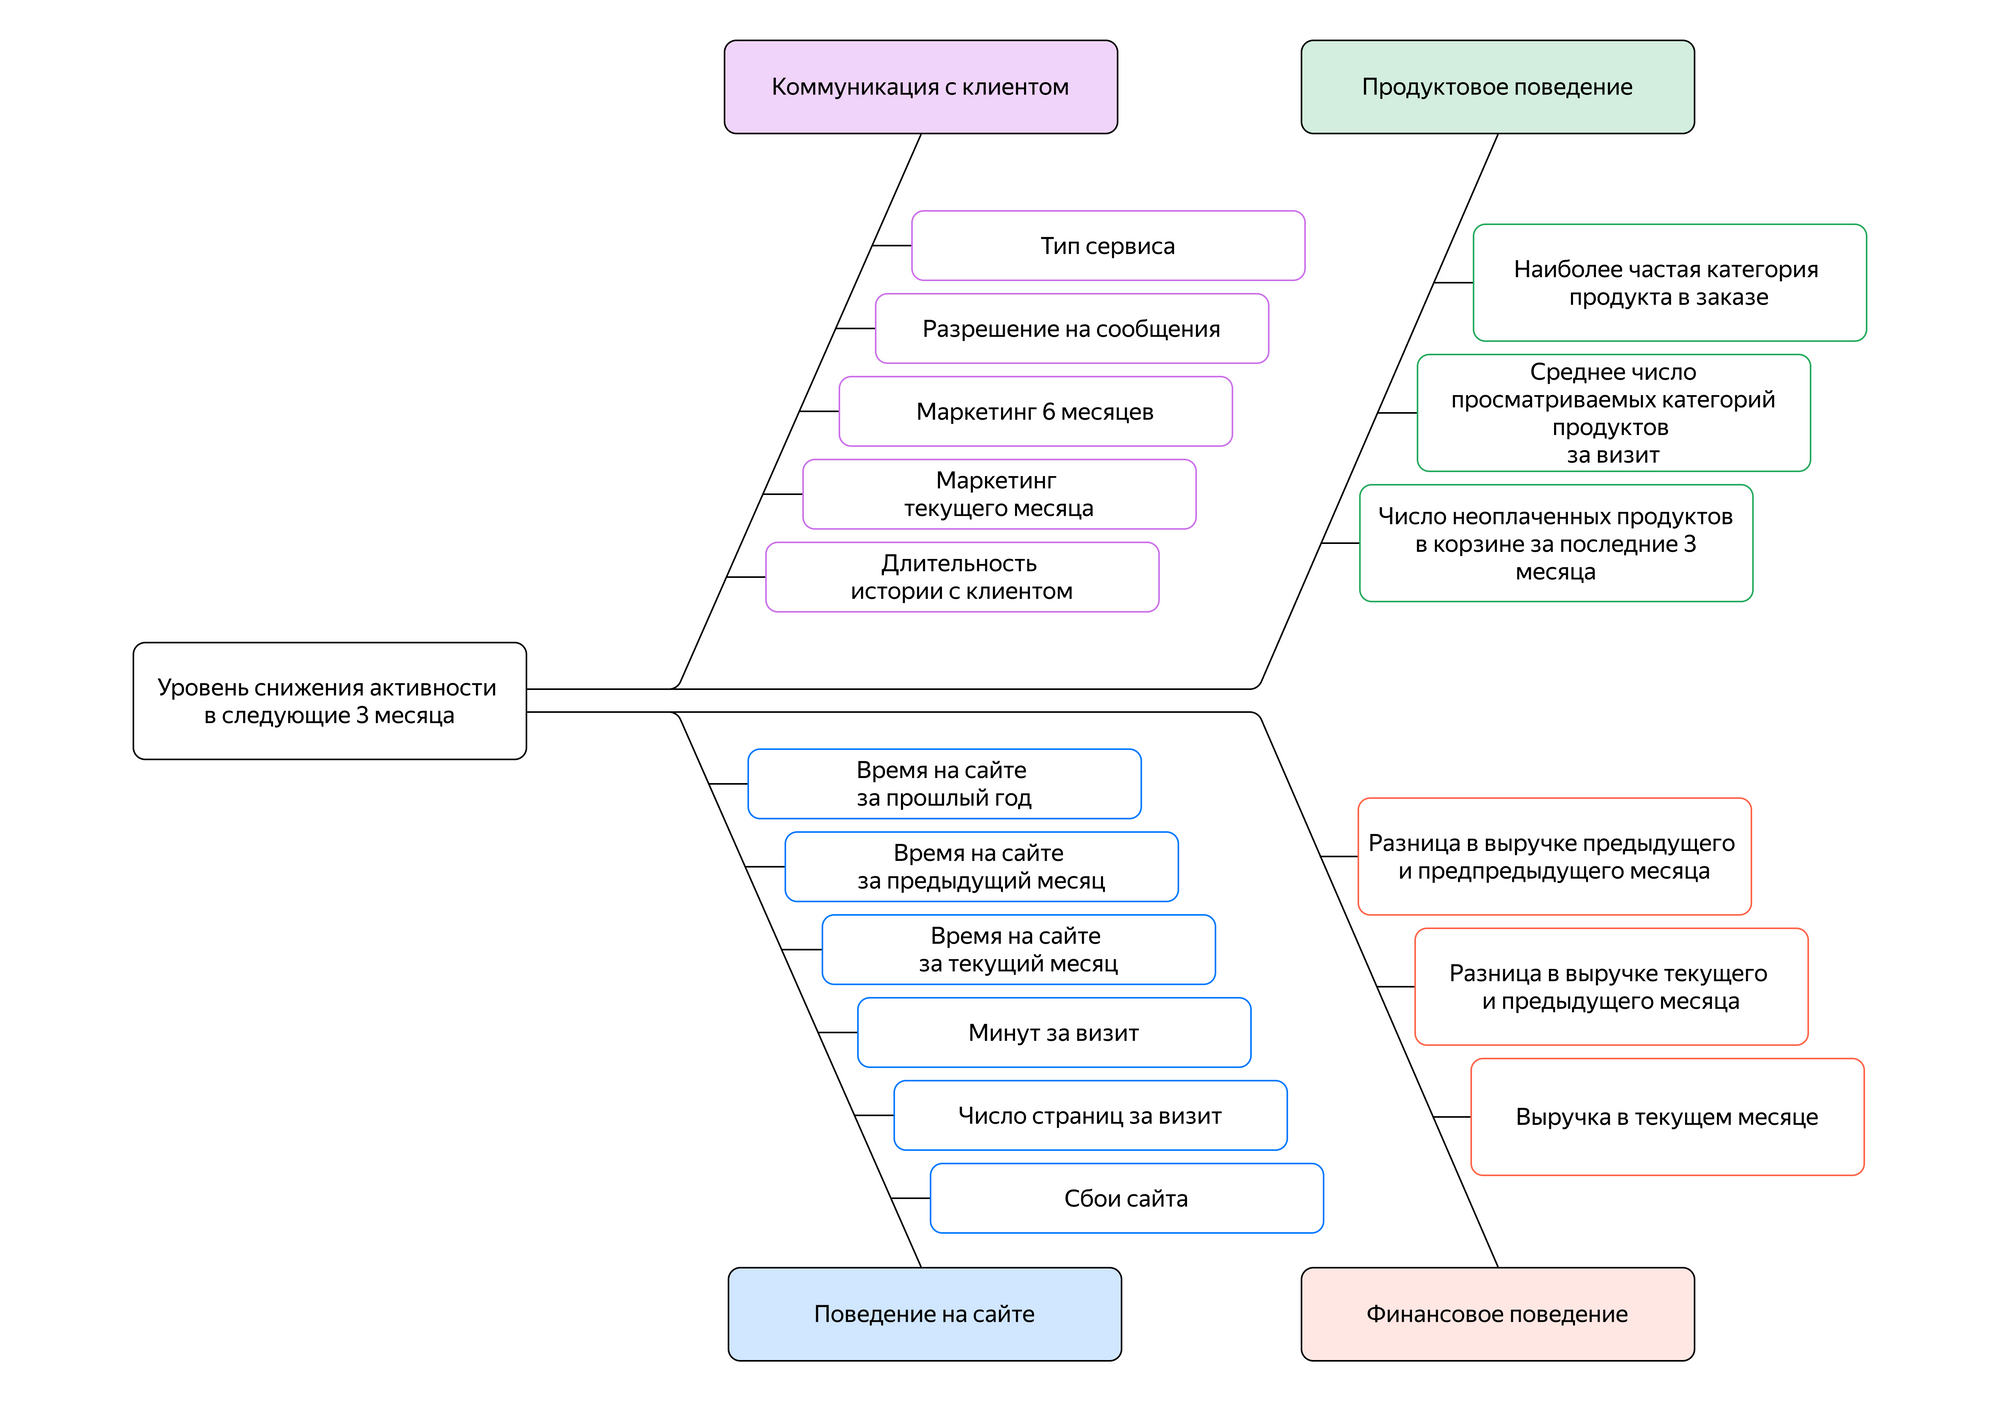

In [85]:
def cat_plot_segment(df, feature):
    colors = sns.color_palette('bright')
    display(df.pivot_table(
        index=feature,
        values='длительность',
        aggfunc='count').rename(columns={'длительность': 'количество'}))
    print('\n')
    plt.figure(figsize=(7,7))
    plt.pie(
        df[feature].value_counts(),
        autopct='%1.2f%%',
        #colors=colors,
        labels=dict(df[feature].value_counts()).keys())
    plt.title(f'Распределение признака `{feature}`')
    plt.legend(loc='upper right');

#### Признаки коммуникации с клиентом

##### Тип сервиса

,количество
тип_сервиса,
премиум,9
стандарт,18


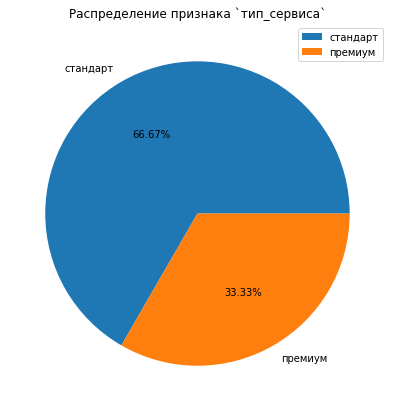

In [105]:
cat_plot_segment(market_segment.query('акционная_категория == 1'), 'тип_сервиса')

##### Разрешение на сообщения

,количество
разрешение_сообщать,
да,20
нет,7


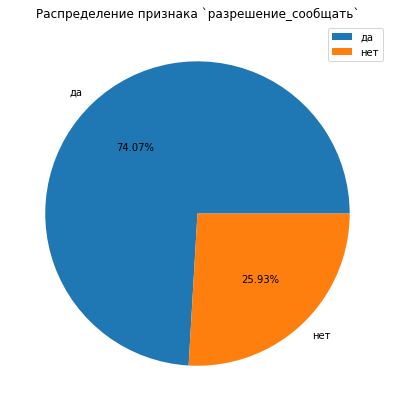

In [106]:
cat_plot_segment(market_segment.query('акционная_категория == 1'), 'разрешение_сообщать')

##### Маркетинг 6 месяцев

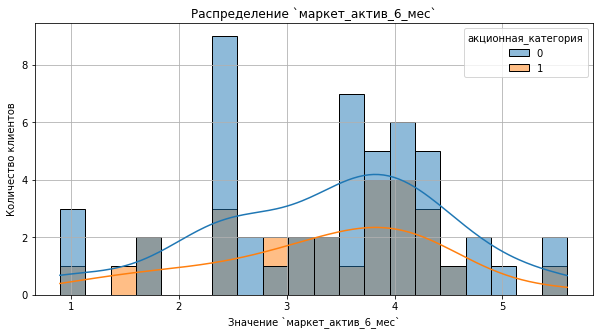

In [88]:
searching_hist(market_segment, 'маркет_актив_6_мес', 'акционная_категория')

##### Маркетинг текущего месяца

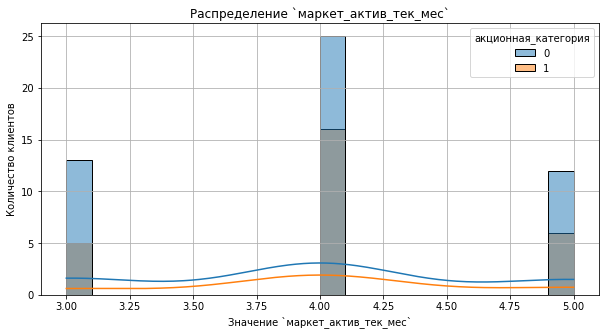

In [89]:
searching_hist(market_segment, 'маркет_актив_тек_мес', 'акционная_категория')

##### Длительность истории с клиентом

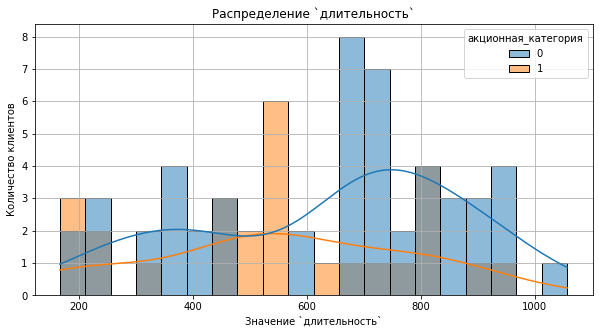

In [90]:
searching_hist(market_segment, 'длительность', 'акционная_категория')

**Вывод**

Исходя из того, что распределения аналогичны можно сделать вывод о том, что признаки коммуникации с клиентом не влияют на снижение активности в рассматриваемом сегменте.

#### Признаки продуктового поведения

##### Наиболее частая категория в заказе

,количество
поп_категория,
Домашний текстиль,7
Косметика и аксесуары,2
Кухонная посуда,3
Мелкая бытовая техника и электроника,1
Техника для красоты и здоровья,3
Товары для детей,11


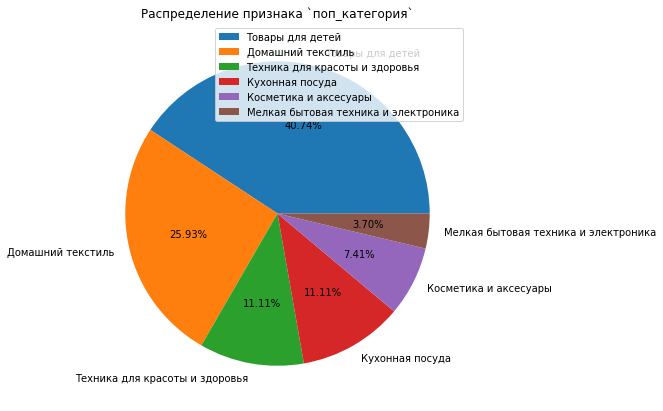

In [104]:
cat_plot_segment(market_segment.query('акционная_категория == 1'), 'поп_категория')

##### Среднее число просматриваемых категорий за визит

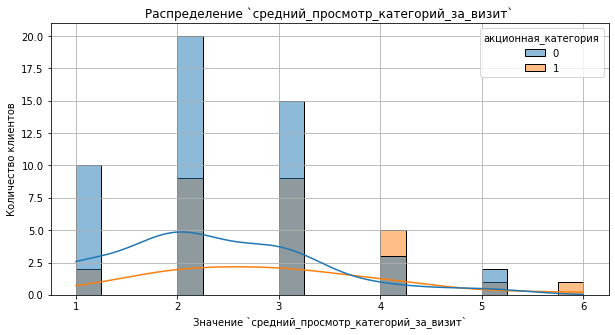

In [95]:
searching_hist(market_segment, 'средний_просмотр_категорий_за_визит', 'акционная_категория')

##### Число неоплаченных продуктов в корзине за квартал

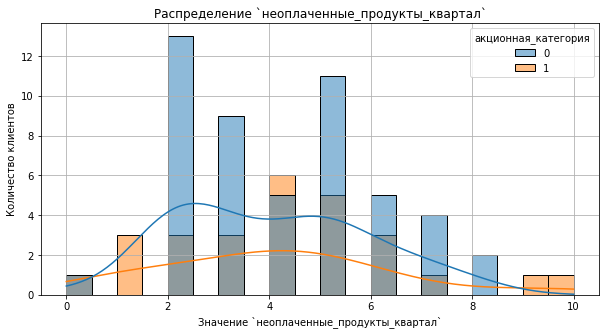

In [96]:
searching_hist(market_segment, 'неоплаченные_продукты_квартал', 'акционная_категория')

**Вывод**

По признакам продуктового поведения можно сделать следующие выводы:
- Более популярными в исследуемом сегменте и акционной группе являются категории:
    - Товары для детей (41%);
    - Домашний текстиль (26%);
    - Товары для красоты и здоровья (11%);
    - Кухонная посуда (11%).
- В рассматриваемом сегменте просматривают меньшее количество страниц, в среднем 2;
- В рассматриваемом сегменте в корзине у акционных клиентов находится больше товаров, вероятно, они лежат до появления акции на эти виды товаров.

#### Признаки финансового поведения

##### Выручка в текущем месяце

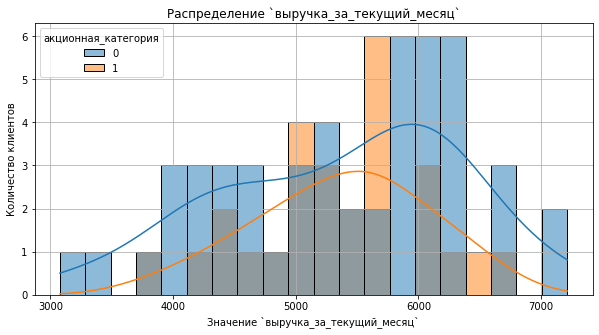

In [97]:
searching_hist(market_segment, 'выручка_за_текущий_месяц', 'акционная_категория')

##### Выручка в предыдущем месяце

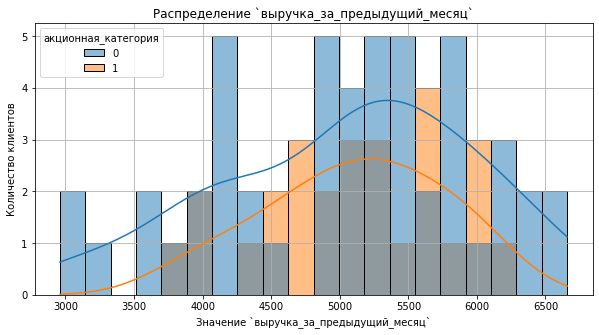

In [98]:
searching_hist(market_segment, 'выручка_за_предыдущий_месяц', 'акционная_категория')

##### Выручка в препредыдущем месяце

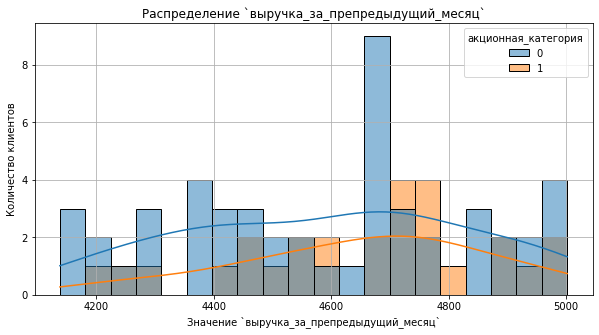

In [99]:
searching_hist(market_segment, 'выручка_за_препредыдущий_месяц', 'акционная_категория')

**Вывод**

В финансовом поведении клиентов рассмтариваемого сегмента нет разительных отличий, за исключением препредыдущего месяца. Их выручка ниже, однако в текущем и предыдущих месяцах их выручка выравнивается с остальными пользователями.

#### Признаки поведения на сайте

##### Время на сайте за предыдущий месяц

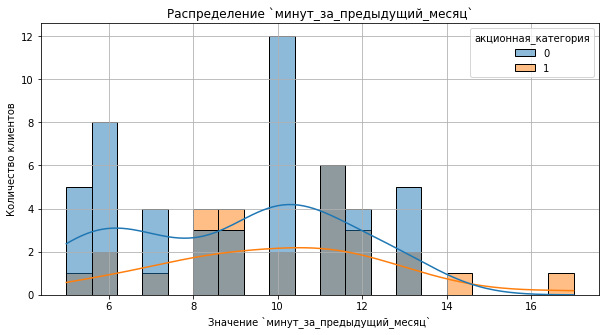

In [100]:
searching_hist(market_segment, 'минут_за_предыдущий_месяц', 'акционная_категория')

##### Время на сайте за текущий месяц

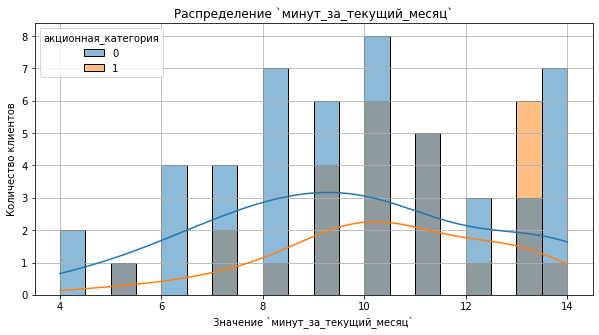

In [101]:
searching_hist(market_segment, 'минут_за_текущий_месяц', 'акционная_категория')

##### Число страниц за визит

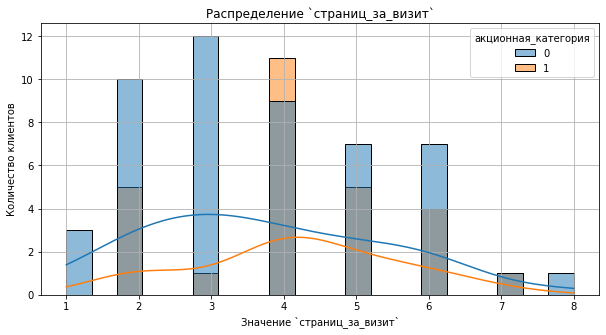

In [102]:
searching_hist(market_segment, 'страниц_за_визит', 'акционная_категория')

##### Сбои сайта

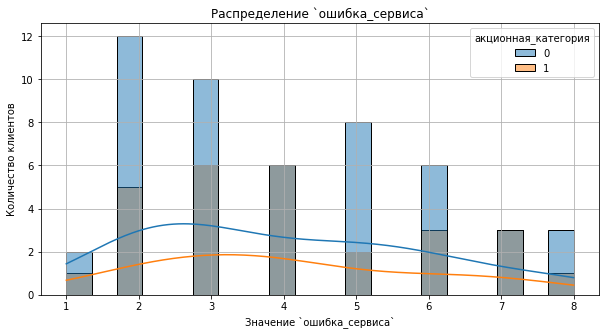

In [107]:
searching_hist(market_segment, 'ошибка_сервиса', 'акционная_категория')

In [109]:
# задаём уровень значимости
alpha = 0.05

market_segment_other_group = market_segment_other.sample(n=27, random_state=RANDOM_STATE)
results = st.ttest_ind(market_segment_research['ошибка_сервиса'], market_segment_other_group['ошибка_сервиса'], alternative='less')

display(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')

'p-value: 0.5544010954030966'

'Нет оснований отвергнуть нулевую гипотезу'

**Вывод**

Признаки поведения на сайте показывают, что клиенты в рассматриваемом сегменте проводят на сайте меньше времени и открывают меньше страниц, чем остальные пользователи. Таким образом, их покупки происходят быстро, они не долго выбирают, а как будто сразу знают, что им нужно. Также статичстическая проверка ошибок сервиса в исследуемом сегменте и у остальных пользователей показала, что с большой долей вероятности ошибки у обоих сегментов равны.

### Вывод

В ходе сегментации пользователей и дальнейшего ииследования сегмента можно сделать следующие выводы:
- В качестве сегмента для рассмотрения выберем покупателей с высокой вероятносью к снижению активности и высокой прибылью. Возьмем порог 0.7 для вероятности и 3 для прибыли.
- Вне зависимости от снижения активности значение прибыли имеет похожее распределение и статистически подтверждено, что с высокой долей вероятности люди со сниженной активностью покупают столько же сколько и остальные пользователи.
- Исходя из того, что распределения аналогичны можно сделать вывод о том, что **признаки коммуникации с клиентом** не влияют на снижение активности в рассматриваемом сегменте.
- По **признакам продуктового поведения** можно сделать следующие выводы:
    - Более популярными в исследуемом сегменте и акционной группе являются категории:
        - Товары для детей (41%);
        - Домашний текстиль (26%);
        - Товары для красоты и здоровья (11%);
        - Кухонная посуда (11%).
    - В рассматриваемом сегменте просматривают меньшее количество страниц, в среднем 2;
    - В рассматриваемом сегменте в корзине у акционных клиентов находится больше товаров, вероятно, они лежат до появления акции на эти виды товаров.
- В **финансовом поведении** клиентов рассмтариваемого сегмента нет разительных отличий, за исключением препредыдущего месяца. Их выручка ниже, однако в текущем и предыдущих месяцах их выручка выравнивается с остальными пользователями.
- **Признаки поведения на сайте** показывают, что клиенты в рассматриваемом сегменте проводят на сайте меньше времени и открывают меньше страниц, чем остальные пользователи. Таким образом, их покупки происходят быстро, они не долго выбирают, а как будто сразу знают, что им нужно. Также статичстическая проверка ошибок сервиса в исследуемом сегменте и у остальных пользователей показала, что с большой долей вероятности ошибки у обоих сегментов равны.
- **Общий вывод.** Трудно сказать, можно ли сохранить людей в рассматриваемом сегменте, потому что снижение их активности, вероятнее всего, связано с периодичностью акций на конкретные товары, а не неудовлетворенностью сервиса. Увеличение коммуникации не даст должного результата, необходимо делать упор на продуктовое поведение и поведение не сайте. Поскольку у данных клиентов большая корзина, вероятно, они ждут более подходящих моментов для этого товара (акция, распродажа), можно было бы на основе их корзины делать им таргетированные предложения со скидкой. При этом они тратят меньше времени на покупки, поэтому стоило бы приводить таргетированные предложения сразу на первой странице, на видном месте или присылать персональные уведомления о скидке на товар в корзине. В качестве товаров для преложений использовать или товары в корзине или наиболее популярные категории: товары для детей, домашний текстиль, товары для красоты и здоровья, кухонная посуда.

## Общий вывод

В ходе проведенного исследования был проделан следующий ряд работ и сделаны следующие выводы:


1. Открыт и изучен файл
    - Датасет `market_file`:
        - Всего в датасете 1300 строк и 13 столбцов;
        - Необходимо привести названия столбцов к единому стилю;
        - Явных пропусков не обнаружено;
        - Данные имеют верный тип;
        - Необходимо проверить данные на дубликаты (замечена опечатка в столбце `Тип сервиса`: 'стандартт');
        - Явных вбросов не обнаружено.
    - Датасет `market_money`:
        - Всего в датасете 3900 строк и 3 столбца;
        - Необходимо привести названия столбцов к единому стилю;
        - Явных пропусков не обнаружено;
        - Данные имеют верный тип;
        - Необходимо проверить данные на дубликаты;
        - Необходимо проверить данные на вбросы (в столбце `выручка` максимальное значение разительно отличается от средних).
    - Датасет `market_time`:
        - Всего в датасете 2600 строк и 3 столбца;
        - Необходимо привести названия столбцов к единому стилю;
        - Явных пропусков не обнаружено;
        - Данные имеют верный тип;
        - Необходимо проверить данные на дубликаты;
        - Явных вбросов не обнаружено.
    - Датасет `money`:
        - Всего в датасете 1300 строк и 2 столбца;
        - Необходимо привести названия столбцов к единому стилю;
        - Явных пропусков не обнаружено;
        - Данные имеют верный тип;
        - Необходимо проверить данные на дубликаты;
        - Явных вбросов не обнаружено.
    - Данные бфли признаны пригодными для исследования.
    
    
2. Проведена предобработка данных:
    - Датасет `market_file`:
        - Названия столбцов приведены к общему виду;
        - Явных дубликатов не обнаружено;
        - Обработаны неявные дубликаты (вероятно, человеческий фактор).
    - Датасет `market_money`:
        - Названия столбцов приведены к общему виду;
        - Дубликатов не обнаружено;
        - Удален выброс в данных в столбце `выручка` (вероятно, техническая ошибка).
    - Датасет `market_time`:
        - Названия столбцов приведены к общему виду;
        - Дубликатов не обнаружено;
        - Исправлена опечатка в столбце `период` (предположительно, человеческий фактор).
    - Датасет `money`:
        - Названия столбцов приведены к общему виду;
        - Дубликатов не обнаружено.
        
        
3. Проведен исследовательский анализ данных:
    - Датасет `market_file`:
        - Признак `покупательская активность`. Она действительно снижается, об этом нам говорит распределение выборки. Активность 38 процентов пользователей снизилась, в то время как у 62 процентов она остается прежней;
        - Признак `тип_сервиса`. В распределении все очевидно, стандартную подписку имеют большинство 71%, в то время как премиум только 29%;
        - Признак `разрешение_сообщать`. Дали разрешение на рассылку и сообщения дали 74%, а запретили 26%;
        - Признак `маркет_актив_6_мес`. Распределение маркетинговой активности имеет максимальное значение на 4 контактах с клиентом, вероятно, это является необходимым минимумом в отделе маркетинга, звонок или реклама раз в неделю;
        - Признак `маркет_актив_тек_мес`. На распределении месячной маркетинговой активности видим подтверждение предыдущего вывода, в месяц делается в среднем 4 контакта с клиентом.
        - Признак `длительность`. Распределние длительности регистрации показывает изменение притока пользователей на сайт. Можно заметить, что самых первых клиентов, зарегистрировавшихся более 1000 дней назад, мало, как и бывает в начале открытия сайта, пока никто не знает о нем. Затем был рост и судя по самый последним клиентам, рост замедлился, что, действительно, говорит о снижении активности пользователей и приходе всей целевой аудитории, которая могла;
        - Признак `акционные_покупки`. Распределение столбца разделяет клиентов на две группы: те, кто периодически покупает товары по акции, и те, кто покупает практически по акции. Вероятно, одни отслеживют акции, а другие нет.
        - Признак `поп_категория`. По распределению было замечено, что наиболее популярными категориями у клиентов являются:
            - Товары для детей(25%);
            - Домашний текстиль(19%);
            - Косметика и аксесуары(17%).
        - Признак `средний_просмотр_категорий`. Распредление показало, что наиболее часто покупатель смотрит в большинстве случаев 3 категории;
        - Признак `неоплаченные_продукты_квартал`. В большинстве случаев, клиенты имеют в своей корзине от 1 до 4 неоплаченных товаров.
        - Признак `ошибка_сервиса`. Ошибок сервиса, с которыми столкнулся покупатель, имеет наиболее часто встречаемое значение 4 раза и распределение количества ошибок имеет нормальное распределение.
        - Признак `страниц_за_визит`. Распредление среднего количества страниц за 3 месяца имеет нормальное распределение и имеет наиболее частое значение около 5 страниц за визит.
    - Датасет `market_money`:
        - Признак `период`. Было замечено, что клиенты, отобранные для выборки были распределены равномерно между тремя месяцами и отобраны активные из них;
        - Признак `выручка`. Данные распределены нормально с медианой около 5000. Имеются выбросы, но были исключены только нереалистичные и нулевые, чтобы не искажать данные. Выручка постпенно увеличивается с каждым месяцем в среднем на 4%.
    - Датасет `market_time`:
        - Признак `период`. В столбце наблюдается ровное разделение данных на два месяца;
        - Признак `минут`. Распределение минут имеет вид нормального с медианой 13. Несмотря на то, что записи разделены по месяцам поровну, количество минут в предыдущем месяце больше, чем в текущем на 2%.
    - Датасет `money`:
        - Признак `прибыль`. Значения прибыли среди клиентов распределено нормально. Есть небольшие отклонения от IQR, но в связи со спецификой значений прибыли было принято рещение их оставить.
    - Общий вывод:
        - Данные пригодны для дальнейшего исследования, критических изменений не внесено. Покупательская активность действительно снижается, так как была набрана целевая категория, поэтому одним из варинатов решения проблемы будут персонализирвоанные предложения.
    
    
4. Проведен корреляционный анализ:
    - Между признаками `выручка_за_текущий_месяц` и `выручка_за_предыдущий_месяц` наблюдается зависимость (0.84), но поскольку она меньше 0.9, мы не можем говорить о мультиколлинеарности, поэтому оставим их.
    - Целевой признак `покупательская_активность` имеет заметную или высокую корреляцию со следующими признаками:
        - `маркет_актив_6_мес` (0.54);
        - `акционные_покупки` (0.51);
        - `средний_просмотр_категорий_за_визит` (0.54);
        - `неоплаченные_продукты_квартал` (0.51);
        - `страниц_за_визит` (0.75);
        - `выручка_за_препредыдущий_месяц` (0.5);
        - `минут_за_предыдущий_месяц` (0.69);
        - `минут_за_текущий_месяц` (0.58).

    
5. Построены модели машинного обучения при помощи пайплайнов:
    - В ходе разработки пайплайнов было выявлено, что лучшей моделью является модель логичтиской регрессии со следующими параметрами `LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')`. В качестве метрики была выбрана ROC-AUC, для тренировочной выборки метрика составила 0.9, а для валидационной выборки 0.89. Это является хорошим результатом и подтверждает качество разработанной модели.
    
    
6. Проведен анализ важности признаков:
    - Наиболее важными для модели являются следующие признаки:
        - `страниц_за_визит` (Чем больше значение, тем выше вероятность сохранения прежней активности);
        - `средний_просмотр_категорий_за_визит` (Чем больше значение, тем выше вроятность сохранения прежней активности);
        - `минут_за_предыдущий_месяц` (Чем больше значение, тем выше вроятность сохранения прежней активности);
        - `неоплаченные_продукты_квартал` (Чем меньше значение, тем выше вроятность сохранения прежней активности);
        - `минут_за_текущий_месяц` (Чем больше значение, тем выше вроятность сохранения прежней активности);
        - `акционные_покупки` (Чем меньше значение, тем выше вроятность сохранения прежней активности).


7. Проведена сегментация пользователей:
    - В качестве сегмента для рассмотрения выберем покупателей с высокой вероятносью к снижению активности и высокой прибылью. Возьмем порог 0.7 для вероятности и 3 для прибыли.
    - Вне зависимости от снижения активности значение прибыли имеет похожее распределение и статистически подтверждено, что с высокой долей вероятности люди со сниженной активностью покупают столько же сколько и остальные пользователи.
    - Исходя из того, что распределения аналогичны можно сделать вывод о том, что **признаки коммуникации с клиентом** не влияют на снижение активности в рассматриваемом сегменте.
    - По **признакам продуктового поведения** можно сделать следующие выводы:
        - Более популярными в исследуемом сегменте и акционной группе являются категории:
            - Товары для детей (41%);
            - Домашний текстиль (26%);
            - Товары для красоты и здоровья (11%);
            - Кухонная посуда (11%).
        - В рассматриваемом сегменте просматривают меньшее количество страниц, в среднем 2;
        - В рассматриваемом сегменте в корзине у акционных клиентов находится больше товаров, вероятно, они лежат до появления акции на эти виды товаров.
    - В **финансовом поведении** клиентов рассмтариваемого сегмента нет разительных отличий, за исключением препредыдущего месяца. Их выручка ниже, однако в текущем и предыдущих месяцах их выручка выравнивается с остальными пользователями.
    - **Признаки поведения на сайте** показывают, что клиенты в рассматриваемом сегменте проводят на сайте меньше времени и открывают меньше страниц, чем остальные пользователи. Таким образом, их покупки происходят быстро, они не долго выбирают, а как будто сразу знают, что им нужно. Также статичстическая проверка ошибок сервиса в исследуемом сегменте и у остальных пользователей показала, что с большой долей вероятности ошибки у обоих сегментов равны.
    - **Общий вывод.** Трудно сказать, можно ли сохранить людей в рассматриваемом сегменте, потому что снижение их активности, вероятнее всего, связано с периодичностью акций на конкретные товары, а не неудовлетворенностью сервиса. Увеличение коммуникации не даст должного результата, необходимо делать упор на продуктовое поведение и поведение не сайте. Поскольку у данных клиентов большая корзина, вероятно, они ждут более подходящих моментов для этого товара (акция, распродажа), можно было бы на основе их корзины делать им таргетированные предложения со скидкой. При этом они тратят меньше времени на покупки, поэтому стоило бы приводить таргетированные предложения сразу на первой странице, на видном месте или присылать персональные уведомления о скидке на товар в корзине. В качестве товаров для преложений использовать или товары в корзине или наиболее популярные категории: товары для детей, домашний текстиль, товары для красоты и здоровья, кухонная посуда.


8. Итоговый вывод:
    - Разработанная модель машинного обучения показала хорошие результаты на контрольной выборке, с ее помощью можно прогнозировать пользователей со снизившейся активностью. На основании этого для них можно делать таргетированные предложение по товарам в их корзине или по популярным категориям: товары для детей, домашний текстиль, товары. При этом располагать такие предложения на видном месте: на главной странице, в личных уведомлениях на телефоне, чтобы сократить их пусть поиска товаров.